


# TRABAJO PRACTICO - PROPIEDAS: GRUPO 8 

Autores:
- Choconi Lucas
- Berra Eliel 
- Mina Federico
- Maria Eva Ortega
- Scillato German



# INDICE
### IMPORTACION DE LIBRERIAS Y DATOS
### ANALISIS GENERAL DE DATASET
### ANALISIS COLUMNAS 
- "surface_total_in_m2" y "surface_covered_in_m2"
- "price_aprox_local_currency" , "price_aprox_usd" , "surface_total_in_m2" , "surface_covered_in_m2" , 
- "price_usd_per_m2", "price_per_m2"
- "description" , "rooms" , 
- "place_name" , "place_with_parent_names" , "country_name" , 
- "state_name" , "lat-lon" , "lat" , "lon" , "geonames_id"

### LIMPIEZA FINAL
### CONCLUSIONES Y RESUMEN DEL TRABAJO



# IMPORTACION DE LIBRERIAS Y DATOS
<b>

    
---


In [1]:
#!pip install seaborn 
import seaborn as sns
palette = sns.color_palette("Paired")
palette


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from scipy.stats import iqr # calculo rango intercuartilico.

In [3]:
# Utiliza librería de geolocalización utilizadas para el entorno dhdsblend2021_geopandas
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads
from string import capwords
# para utilizar la librería tqdm instalar en el entorno: conda install -c conda-forge tqdm
#from tqdm.auto import tqdm        las celdas que utilizan la librería tqdm están comentadas
from geopy.distance import geodesic

In [4]:
data_location = "data/properatti.csv" # dataset en carpeta data
data = pd.read_csv(data_location)
data_inicial = data.copy()
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...




# ANALISIS GENERAL DE DATASET:
- Cantidad de NA por columna.
- Tipo de objetos por columna.
- Cantidad de valores por columnas representativos.
<b>

    
---


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [6]:
#Calculo de porcentajes de NA en dataset para cada columna.
NA_iniciales = []
for col in data.columns:
    print(
        np.round(data[col].isna().sum() / len(data[col])* 100,
            1 ),
        "% NA Columna:",
        col
        )
    NA_iniciales.append(f'{np.round(data[col].isna().sum() / len(data[col])* 100,1 )} % NA Columna:  {col}')

0.0 % NA Columna: Unnamed: 0
0.0 % NA Columna: operation
0.0 % NA Columna: property_type
0.0 % NA Columna: place_name
0.0 % NA Columna: place_with_parent_names
0.0 % NA Columna: country_name
0.0 % NA Columna: state_name
15.4 % NA Columna: geonames_id
42.5 % NA Columna: lat-lon
42.5 % NA Columna: lat
42.5 % NA Columna: lon
16.8 % NA Columna: price
16.8 % NA Columna: currency
16.8 % NA Columna: price_aprox_local_currency
16.8 % NA Columna: price_aprox_usd
32.4 % NA Columna: surface_total_in_m2
16.4 % NA Columna: surface_covered_in_m2
43.4 % NA Columna: price_usd_per_m2
27.7 % NA Columna: price_per_m2
93.5 % NA Columna: floor
60.9 % NA Columna: rooms
88.2 % NA Columna: expenses
0.0 % NA Columna: properati_url
0.0 % NA Columna: description
0.0 % NA Columna: title
2.6 % NA Columna: image_thumbnail


In [7]:
# Cantidad de cada elemento en las columnas: operation , property_type , place_name, country_name, state_name 

columnas = ['operation' , 'property_type' , 'place_name' ,  'country_name' , 'state_name' ]
for col in columnas:
    print("columna: ", col , '\n' , data.loc[data[col].notna(),col].value_counts() ,  '\n' , "--"*40)

columna:  operation 
 sell    121220
Name: operation, dtype: int64 
 --------------------------------------------------------------------------------
columna:  property_type 
 apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64 
 --------------------------------------------------------------------------------
columna:  place_name 
 Córdoba               9254
Rosario               8504
Mar del Plata         6534
Tigre                 3324
Nordelta              3315
                      ... 
Sierras Bayas            1
Paso de los Libres       1
Azara                    1
Coronel Du Graty         1
Altos de Hudson I        1
Name: place_name, Length: 1060, dtype: int64 
 --------------------------------------------------------------------------------
columna:  country_name 
 Argentina    121220
Name: country_name, dtype: int64 
 --------------------------------------------------------------------------------
columna:  state_name 


<b>
<b>



    
    
# ANALISIS COLUMNAS 

### "surface_total_in_m2" y "surface_covered_in_m2"
---------

In [8]:
# Se evalua si hay inconsistencias entre superifcie cubierta y superficie total. 
# Donde debería superficie cubierta <= superifice total

data.loc[data["surface_total_in_m2"] < data["surface_covered_in_m2" ]  ,"surface_covered_in_m2"].head(10)

78      18615.0
177       450.0
316       156.0
317       156.0
455       430.0
668       230.0
918        65.0
1397       89.0
1598      105.0
1690      230.0
Name: surface_covered_in_m2, dtype: float64

In [9]:
# Se observa que existen valores inconsistentes.
print("Cantidad de valores inconsistentes" ,
      data.loc[
              data["surface_total_in_m2"] 
              < data["surface_covered_in_m2" ]  ,
              "surface_covered_in_m2"
              ].value_counts().sum()
     )

Cantidad de valores inconsistentes 1106


In [10]:
# Se decide reemplazar la superficie total por la cubierta cuando se cumple la inconsistentcia anterior.
# Reemplazo de columna  "surface_total_in_m2" por "surface_covered_in_m2" , cuando se cumple Bool slicing 
# con condición de menor.
data.loc[
    data["surface_total_in_m2"] 
    < data["surface_covered_in_m2" ],
        "surface_covered_in_m2" 
        ] =  data.loc[
    data["surface_total_in_m2"] 
    < data["surface_covered_in_m2" ] , 
            "surface_total_in_m2" 
            ]

In [11]:
# Se observa que existen valores inconsistentes luego del reemplazo.
print("Cantidad de valores inconsistentes resultantes luego del reemplazo" ,
      data.loc[
              data["surface_total_in_m2"] < data["surface_covered_in_m2" ]  ,
              "surface_covered_in_m2"
              ].value_counts().sum()
     )

Cantidad de valores inconsistentes resultantes luego del reemplazo 0


In [12]:
# Se evalua NA en ambas columnas.

print("NA en columna de superficie cubierta: " ,
      data['surface_covered_in_m2'].isna().sum(),"\n"
      "NA en columna de superficie total: " ,
      data['surface_total_in_m2'].isna().sum(),"\n"
      "NA en ambas columnas a la vez: ",
      (data['surface_total_in_m2'].isna() & data['surface_covered_in_m2'].isna()).sum(), "\n"
      "NA solo en superficie total pero no en cubierta: " ,
      (data['surface_total_in_m2'].isna() & data['surface_covered_in_m2'].notna()).sum()
     )
    

NA en columna de superficie cubierta:  19907 
NA en columna de superficie total:  39328 
NA en ambas columnas a la vez:  12369 
NA solo en superficie total pero no en cubierta:  26959


In [13]:
# Se reemplazara los NA de superficie total por valores de superficie cubierta.
data.loc[
    data['surface_total_in_m2'].isna() & data['surface_covered_in_m2'].notna(),
    "surface_total_in_m2" 
        ] =  data.loc[
                    (data['surface_total_in_m2'].isna()) & (data['surface_covered_in_m2'].notna()),
                    "surface_covered_in_m2" 
                     ]
print("NA en columna de superficie total: " ,
      data['surface_total_in_m2'].isna().sum(),"\n",
      "NA solo en superficie total pero no en cubierta: " ,
      (data['surface_total_in_m2'].isna() & data['surface_covered_in_m2'].notna()).sum()
     )

NA en columna de superficie total:  12369 
 NA solo en superficie total pero no en cubierta:  0


#### Evaluación de outliers de ambas columnas

In [14]:
# Evaluación de outliers en ambas columnas
col = [
    "surface_total_in_m2" ,
    "surface_covered_in_m2" , 
    ]

# Calculo de maximo, media y mediana, para evaluar existencia de outlieres.
# Se excluye la columna property_types por ser categórica

data[col].apply(lambda x: print( x.name , 
                                     " Maximo: ",  np.around(np.max(x), 0) ,
                                     " Promedio: ", np.around(np.mean(x), 0),
                                     " Mediana: ", np.around(np.nanmedian(x), 0),
                                     "\n" ))

surface_total_in_m2  Maximo:  200000.0  Promedio:  211.0  Mediana:  83.0 

surface_covered_in_m2  Maximo:  187000.0  Promedio:  130.0  Mediana:  75.0 



surface_total_in_m2      None
surface_covered_in_m2    None
dtype: object

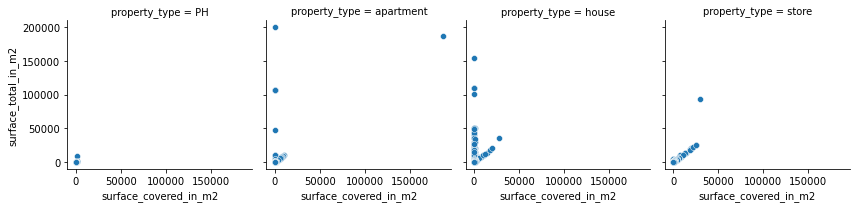

In [15]:
# Se observan claros outliers: Máximo >>> promedio y mediana. 
# Grafico de dispersión y de distribución para evaluar outliers. 

grid = sns.FacetGrid(data,  col= "property_type", margin_titles=True)
grid.map(sns.scatterplot, 'surface_covered_in_m2' ,"surface_total_in_m2" )

Text(0.5, 1.0, 'Distribución Superficie Cubierta')

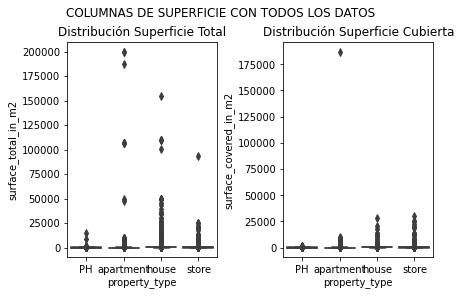

In [16]:
# grafico de distribución, dividido para cada tipo propiedad para ambas columnas de superficie.
fig1, axes = plt.subplots(nrows = 1, ncols = 2 , constrained_layout=True)

fig1.suptitle("COLUMNAS DE SUPERFICIE CON TODOS LOS DATOS")
sns.boxplot(y = data['surface_total_in_m2'], x = data['property_type'] , data = data , orient = "v" , ax = axes[0] )
axes[0].set_title("Distribución Superficie Total")
sns.boxplot(y = data['surface_covered_in_m2'], x = data['property_type'] , data = data , orient = "v" , ax = axes[1] )
axes[1].set_title("Distribución Superficie Cubierta")


In [17]:
# Calculo de rangos intercuartilicos y cuartiles, para calcular outliers.
q1_cover =np.percentile(data.loc[data['surface_covered_in_m2'].notna(),'surface_covered_in_m2' ] , 25)
q3_cover =np.percentile(data.loc[data['surface_covered_in_m2'].notna(),'surface_covered_in_m2' ] , 75)
q1_total =np.percentile(data.loc[data['surface_total_in_m2'].notna(),'surface_total_in_m2' ] , 25)
q3_total =np.percentile(data.loc[data['surface_total_in_m2'].notna(),'surface_total_in_m2' ] , 75)

In [18]:
# Calculo de rangos intercuartilicos y cuartiles, para calcular outliers.
iqr_cover = q3_cover - q1_cover
iqr_total = q3_total - q1_total
print( "Superficie cubierta:" , q1_cover , q3_cover + 3*iqr_cover , "\n",
     "Superficie Total", q1_total , q3_total + 3*iqr_total ) 

Superficie cubierta: 45.0 465.0 
 Superficie Total 50.0 610.0


In [19]:
# Se verifica si hay datos con valores de m2 menors a 10 m en ambas variables:
limite_menor_superficie = 10

print(f"Menor a {limite_menor_superficie} m2 en columna de superficie total: " ,
     (data['surface_total_in_m2']< limite_menor_superficie).sum(),"\n"
      f"Menor a {limite_menor_superficie} m2 en columna de superficie cubierta: " ,
      (data['surface_covered_in_m2']< limite_menor_superficie).sum(),"\n"
      f"Valores menores a {limite_menor_superficie} m2 en ambas variables: ",
      (data.loc[(data['surface_covered_in_m2']< limite_menor_superficie) 
                & (data['surface_total_in_m2']< limite_menor_superficie),'surface_total_in_m2' ]).sum(),"\n",
      f"Valores mayor a {limite_menor_superficie} m2 en cubiertos y menor a 10 m2 en total: ",
      (data.loc[(data['surface_covered_in_m2']> limite_menor_superficie) 
                & (data['surface_total_in_m2']< limite_menor_superficie),'surface_total_in_m2' ]).sum(),"\n"
     )




Menor a 10 m2 en columna de superficie total:  682 
Menor a 10 m2 en columna de superficie cubierta:  434 
Valores menores a 10 m2 en ambas variables:  406.0 
 Valores mayor a 10 m2 en cubiertos y menor a 10 m2 en total:  0.0 



In [20]:
# Se evalua que datos son outlibers con los rangos intercuartilicos.

# Se retira los outliers desde 1500 m2 cubiertos y totales
limite_cover = q3_cover + 3*iqr_cover
limite_total = q3_total + 3*iqr_total
sup_sin_outliers = data.loc[(data['surface_covered_in_m2']< limite_cover) & (data['surface_total_in_m2'] < limite_total), [
    "surface_total_in_m2" ,
    "surface_covered_in_m2" , 
    "property_type"
    ]]
# Datos definidos como outliers: Se considera para el porcentaje 

print("Valores Sin NA en sup cubierta: " , data['surface_covered_in_m2'].notna().sum(), "\n",
      "Valores Sin NA en sup total: " , data['surface_total_in_m2'].notna().sum(), "\n",
      "Cantidad de valores sin outliers: " , len(sup_sin_outliers) ,"\n",
      "% de valores sin outliers respecto al total: " , 
      round(len(sup_sin_outliers)/data["surface_covered_in_m2"].notna().sum()*100 ,2) , "\n",)


# Al pasar un bool para hacer el slicing, solo retira los NA
print( "Tener en cuenta que retira los NA: Suma de NA en datos sin outliers", sup_sin_outliers.isna().sum())

Valores Sin NA en sup cubierta:  101313 
 Valores Sin NA en sup total:  108851 
 Cantidad de valores sin outliers:  95512 
 % de valores sin outliers respecto al total:  94.27 

Tener en cuenta que retira los NA: Suma de NA en datos sin outliers surface_total_in_m2      0
surface_covered_in_m2    0
property_type            0
dtype: int64


Text(0.5, 1.0, 'Distribución Superficie Cubierta')

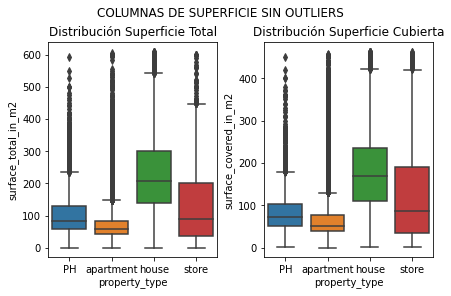

In [21]:
# Se decide dropear los valores definidos por los limites del  Q3 + 3*IQR = 465 para cubierta y 610 para total.

# grafico de distribución, dividido para cada tipo propiedad para ambas columnas de superficie.
fig2, axes = plt.subplots(nrows = 1, ncols = 2 , constrained_layout=True )

fig2.suptitle("COLUMNAS DE SUPERFICIE SIN OUTLIERS")
sns.boxplot(y = sup_sin_outliers['surface_total_in_m2'],
            x = sup_sin_outliers['property_type'] ,
            data = sup_sin_outliers ,
            orient = "v" ,
            ax = axes[0] )
axes[0].set_title("Distribución Superficie Total")
sns.boxplot(y = sup_sin_outliers['surface_covered_in_m2'],
            x = sup_sin_outliers['property_type'] , 
            data = sup_sin_outliers ,
            orient = "v" ,
            ax = axes[1] )
axes[1].set_title("Distribución Superficie Cubierta")


<b>
<b>

##### Resultado parcial:
- Reemplazo NA columna superficie total por no NA superficie cubierta
- Reemplazo valores superficie cubierta> superficie total.
- Identificación de outliers: Definido con rango IQR por 3. Se eliminarán al final del trabajo, de forma de realizarlo de forma ordenada.
<br>
<br>



# Análisis columnas: Variables m2 vs precios.

### "price_aprox_local_currency" , "price_aprox_usd" , "surface_total_in_m2" , "surface_covered_in_m2" , 
###  "price_usd_per_m2", "price_per_m2"
<br>

---


In [22]:
# Se genera un DF nuevo con los datos a analizar
data_precio_m2 = data[["price_aprox_local_currency" ,
                       "price_aprox_usd" ,
                       "surface_total_in_m2" ,
                       "surface_covered_in_m2" , 
                       "price_usd_per_m2",
                       "price_per_m2",
                       "property_type"]]

data_precio_m2.head()

,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,property_type
0,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,PH
1,2646675.0,150000.0,NaN,NaN,NaN,NaN,apartment
2,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,apartment
3,1676227.5,95000.0,NaN,NaN,NaN,NaN,PH
4,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,apartment


In [23]:
# Se evalua NA en las columnas "price_aprox_local_currency" ,"price_aprox_usd".

print("NA en columna de price local currency: " ,
      data['price_aprox_local_currency'].isna().sum(),"\n"
      "NA en columna de price usd: " ,
      data['price_aprox_usd'].isna().sum(),"\n"
      "NA en ambas columnas a la vez: ",
      (data['price_aprox_usd'].isna() & data['price_aprox_local_currency'].isna()).sum(), "\n"
      "NA solo en price_usd pero no en price local currency: " ,
      (data['price_aprox_usd'].isna() & data['price_aprox_local_currency'].notna()).sum()
     )


NA en columna de price local currency:  20410 
NA en columna de price usd:  20410 
NA en ambas columnas a la vez:  20410 
NA solo en price_usd pero no en price local currency:  0


In [24]:
# No hace falta convertir local currency a usd. Iguales filas que tienen NA en ambas columnas. Dropear local currency
# Se evalua NA en las columnas "price_usd_per_m2", "price_per_m2"

print("NA en columna de price usd per m2: " ,
      data['price_usd_per_m2'].isna().sum(),"\n"
      "NA en columna de price per m2: " ,
      data['price_per_m2'].isna().sum(),"\n"
      "NA en ambas columnas a la vez: ",
      (data['price_usd_per_m2'].isna() & data['price_per_m2'].isna()).sum(), "\n"
      "NA solo en price_usd_per_m2 pero no en price_per_m2: " ,
      (data['price_usd_per_m2'].isna() & data['price_per_m2'].notna()).sum(),"\n"
      "NA solo en price_per_m2  pero no en price_usd_per_m2: " ,
      (data['price_usd_per_m2'].notna() & data['price_per_m2'].isna()).sum()
     )


NA en columna de price usd per m2:  52603 
NA en columna de price per m2:  33562 
NA en ambas columnas a la vez:  28295 
NA solo en price_usd_per_m2 pero no en price_per_m2:  24308 
NA solo en price_per_m2  pero no en price_usd_per_m2:  5267


In [25]:
# Se evalua NA en las columnas "price", "price_aprox_usd"

print("NA en columna de price: " ,
      data['price'].isna().sum(),"\n"
      "NA en columna de price_aprox_usd: " ,
      data['price_aprox_usd'].isna().sum(),"\n"
      "NA en ambas columnas a la vez: ",
      (data['price'].isna() & data['price_aprox_usd'].isna()).sum(), "\n"
      "NA solo en price pero no en price_aprox_usd: " ,
      (data['price'].isna() & data['price_aprox_usd'].notna()).sum(),"\n"
      "NA solo en price_aprox_usd  pero no en price: " ,
      (data['price_aprox_usd'].notna() & data['price'].isna()).sum()
     )

#Los NA son los mismos.

NA en columna de price:  20410 
NA en columna de price_aprox_usd:  20410 
NA en ambas columnas a la vez:  20410 
NA solo en price pero no en price_aprox_usd:  0 
NA solo en price_aprox_usd  pero no en price:  0


In [26]:
# No es util reemplazar precios aprox USD con valores price usd per m2, ya que no aporta nuevos valores.
# Debido a que hay valores NA en precio usd per m2 y no en price per m2, es conveniente convertir a usd esos valores.

# Se utiliza tipo de cambio USD/ARS del semestre del año de los datos.
cambio_usd_ars = 17.83

# VALORES EXPRESADOS EN USD
display ( data.currency.value_counts() )
#Solo se calcula sobre ARS, el resto de monedas se dropea por no ser significativas
data['Price_USD'] = data.apply(lambda x: x["price"] / cambio_usd_ars if x['currency'] == 'ARS' else x["price"] , axis=1)
display( data.loc[data['currency']=='USD', ['Price_USD','price','currency']].head(3) )
display( data.loc[data['currency']=='ARS', ['Price_USD','price','currency']].head(3) )



USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

,Price_USD,price,currency
0,62000.0,62000.0,USD
1,150000.0,150000.0,USD
2,72000.0,72000.0,USD


,Price_USD,price,currency
9,25799.214807,460000.0,ARS
32,30846.887269,550000.0,ARS
37,70106.561974,1250000.0,ARS


Decidimos eliminar 107 filas con precio <10kusd ya que consideramos seran alquileres       o propiedades que van a alterar el modelo


<AxesSubplot:ylabel='Frequency'>

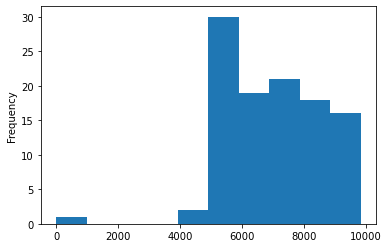

In [27]:
print('Decidimos eliminar {} filas con precio <10kusd ya que consideramos seran alquileres \
      o propiedades que van a alterar el modelo'.format((data['Price_USD']<10000).sum()))

display( data.Price_USD[data.Price_USD<10000].plot(kind='hist') )

In [28]:
# Comparativa de NA entre  "price_usd_per_m2", "price_aprox_usd"

print("NA en columna de price usd per m2: " ,
      data['price_usd_per_m2'].isna().sum(),"\n"
      "NA en columna de price aprox usd: " ,
      data['price_aprox_usd'].isna().sum(),"\n"
      "NA en ambas columnas a la vez: ",
      (data['price_aprox_usd'].isna() & data['price_usd_per_m2'].isna()).sum(), "\n"
      "NA solo en price_aprox_usd pero no en price_usd_per_m2: " ,
      (data['price_aprox_usd'].isna() & data['price_usd_per_m2'].notna()).sum(),"\n"
      "NA solo en price_usd_per_m2  pero no en price_aprox_usd: " ,
      (data['price_aprox_usd'].notna() & data['price_usd_per_m2'].isna()).sum())
     

NA en columna de price usd per m2:  52603 
NA en columna de price aprox usd:  20410 
NA en ambas columnas a la vez:  20410 
NA solo en price_aprox_usd pero no en price_usd_per_m2:  0 
NA solo en price_usd_per_m2  pero no en price_aprox_usd:  32193


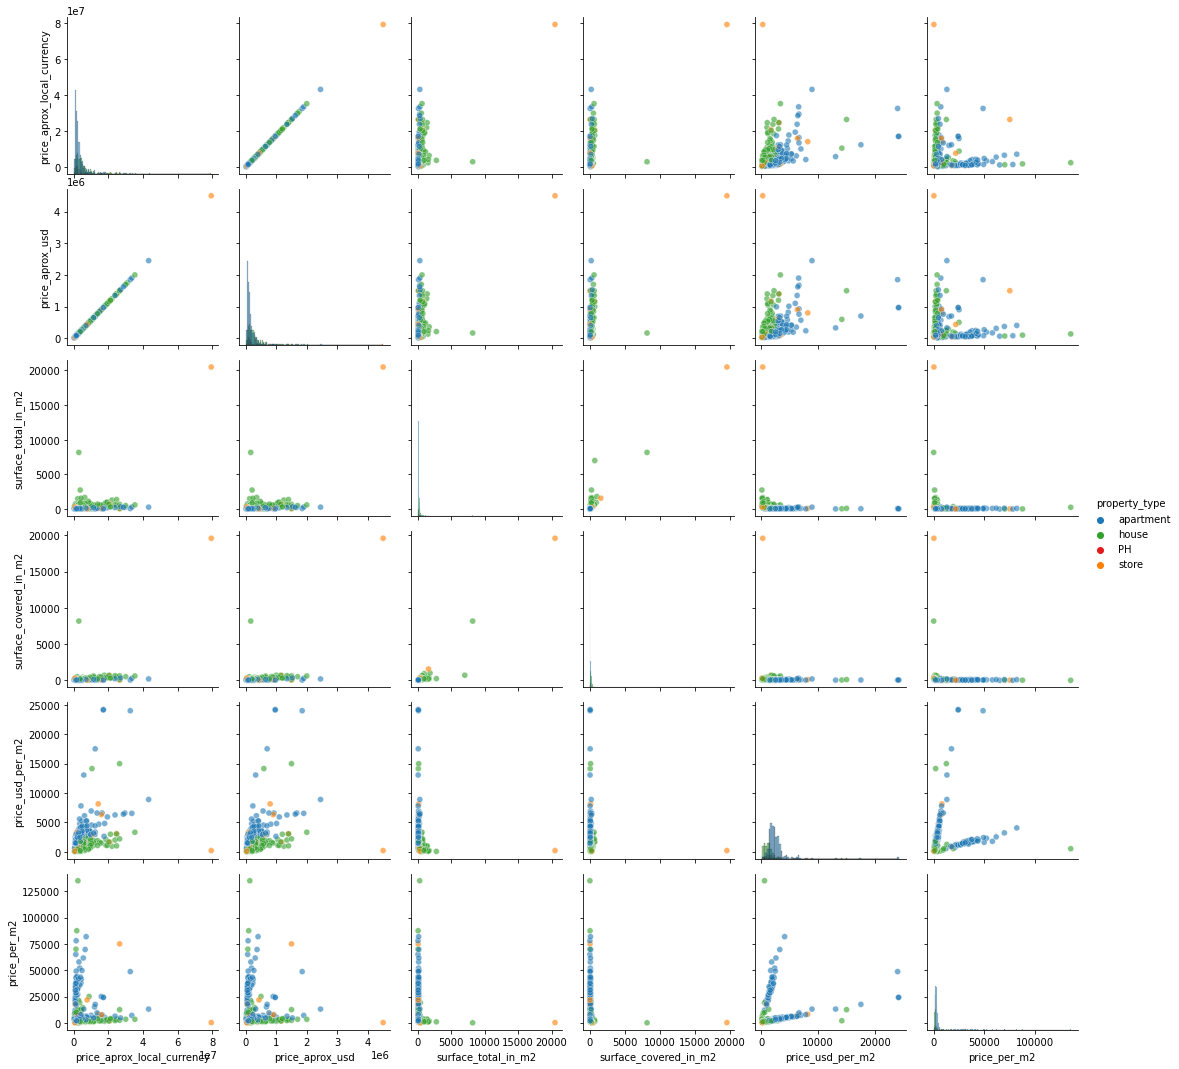

In [29]:
# Grafico de relaciones entre las distintas columnas.

g3 = sns.PairGrid(data = data_precio_m2.sample(1000), hue='property_type', palette = palette[1:8:2] ) # se utiliza misma paleta
g3.map_diag(sns.histplot) # Probar con kdeplot
g3.map_offdiag(sns.scatterplot, alpha=0.6)
g3.add_legend()

In [30]:
# Los outliers dificultan la visualización. 
# Evaluación de outliers
col_numericas = ["price_aprox_local_currency" ,
               "price_aprox_usd" ,
               "surface_total_in_m2" ,
               "surface_covered_in_m2" , 
               "price_usd_per_m2",
               "price_per_m2"
                ]

In [31]:
# Calculo de maximo, media y mediana, para evaluar existencia de outliers.
# Se excluye la columna property_types por ser categórica

outliers_precio = data_precio_m2[col_numericas].apply(lambda x: f'{x.name} --- Maximo: {np.around(np.max(x), 0)} \
--- Promedio: {np.around(np.mean(x), 0)} \
--- Mediana: {np.around(np.nanmedian(x), 0)}' )

print(*outliers_precio , sep = "\n")

price_aprox_local_currency --- Maximo: 821271104.0 --- Promedio: 4229397.0 --- Mediana: 2558452.0
price_aprox_usd --- Maximo: 46545445.0 --- Promedio: 239701.0 --- Mediana: 145000.0
surface_total_in_m2 --- Maximo: 200000.0 --- Promedio: 211.0 --- Mediana: 83.0
surface_covered_in_m2 --- Maximo: 187000.0 --- Promedio: 130.0 --- Mediana: 75.0
price_usd_per_m2 --- Maximo: 206333.0 --- Promedio: 2160.0 --- Mediana: 1800.0
price_per_m2 --- Maximo: 4000000.0 --- Promedio: 6912.0 --- Mediana: 2213.0


In [32]:
# Calculo de rangos intercuartilicos y cuartiles, para calcular outliers de precios.
q1_precio =np.round(np.percentile(data.loc[data['price_aprox_usd'].notna(),'price_aprox_usd' ] , 25),1)
q3_precio =np.round(np.percentile(data.loc[data['price_aprox_usd'].notna(),'price_aprox_usd' ] , 75),1)
q1_precio_m2 =np.round(np.percentile(data.loc[data['price_usd_per_m2'].notna(),'price_usd_per_m2' ] , 25),1)
q3_precio_m2 =np.round(np.percentile(data.loc[data['price_usd_per_m2'].notna(),'price_usd_per_m2' ] , 75),1)

In [33]:
# Calculo de rangos intercuartilicos y cuartiles, para calcular outliers.
iqr_precio = np.round(q3_precio - q1_precio,1)
iqr_precio_m2 = np.round(q3_precio_m2 - q1_precio_m2,1)
print( "precio usd:" , q1_precio , q3_precio + 3*iqr_precio , "\n",
     "precio por m2: ", q1_precio_m2 , q3_precio_m2 + 3*iqr_precio_m2 ) 

precio usd: 89733.9 790798.3 
 precio por m2:  1218.2 6291.0


In [34]:
# Se filtra outliers para "price_aprox_usd" y para "price_usd_per_m2"
limite_precio = q3_precio + 3*iqr_precio
limite_precio_m2 = q3_precio_m2 + 3*iqr_precio_m2
data_outliers = data.loc[(data["price_aprox_usd"] > limite_precio) & (data["price_usd_per_m2"] >limite_precio_m2),
                         ["price_aprox_usd" ,
                          "price_usd_per_m2",
                          "property_type"]
                        ] 

print(data_outliers.shape , "\n" , data_outliers.head())

(663, 3) 
       price_aprox_usd  price_usd_per_m2 property_type
610          813000.0       8130.000000     apartment
1424         810000.0      20250.000000     apartment
4664        1370000.0       7172.774869     apartment
5500        2200000.0       9565.217391     apartment
5674        1500000.0       6976.744186     apartment


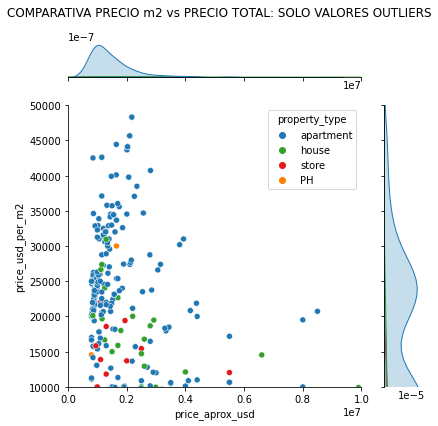

In [35]:
# Se observan outliers posiblemente errores en 'price_usd_per_m2' y 'price_aprox_usd'. Se grafican para evaluar si tienen 
# sentido los valores.
g=sns.jointplot(
                x = data_outliers["price_aprox_usd"],
                y = data_outliers["price_usd_per_m2"],
                kind = "scatter" ,
                xlim = (0,1E7),
                ylim=(1E4, 5E4),
                hue = data_outliers["property_type"],
                palette = palette[1:8:2]
               ) # palette de 0 a 4, para definir que colores se usan para cada  'property_type'

plt.suptitle("COMPARATIVA PRECIO m2 vs PRECIO TOTAL: SOLO VALORES OUTLIERS")
plt.tight_layout() # Acomoda titulo y layout.

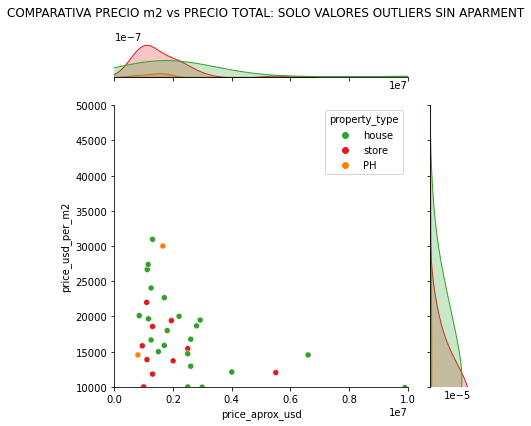

In [36]:
# Se repite el gráfico sin los datos de "apartment", para evaluar si hay los otros tipos de vivienda.

data_outliers_sin_apartment = data.loc[
                         (data["price_aprox_usd"] > limite_precio) &
                         (data["price_usd_per_m2"] >limite_precio_m2) &
                         (data["property_type"] != "apartment"),
                                                             ["price_aprox_usd" ,
                                                              "price_usd_per_m2",
                                                              "property_type"]
                       ]  


g=sns.jointplot(
                x = data_outliers_sin_apartment ["price_aprox_usd"],
                y = data_outliers_sin_apartment ["price_usd_per_m2"],
                kind = "scatter" ,
                xlim = (0,1E7),
                ylim=(1E4, 5E4),
                hue = data_outliers_sin_apartment ["property_type"],
                palette = palette[3:8:2] # Toma desde 3 para matchear con los mismos colores grafico anterior.
               )
plt.suptitle("COMPARATIVA PRECIO m2 vs PRECIO TOTAL: SOLO VALORES OUTLIERS SIN APARMENT")
plt.tight_layout() # Acomoda titulo y layout.

In [37]:
# Se observa outliers principalmente en apartment.

# Se realiza  separación en intervalos para price_aprox_usd para tabla pivot
precios_usd = pd.cut(data_precio_m2['price_aprox_usd'] , [0 , 50000 , 1E6 , 1E7] )
# Cantidad de elementos en cada intervalo
precios_usd.value_counts()

(50000.0, 1000000.0]       94134
(0.0, 50000.0]              4283
(1000000.0, 10000000.0]     2379
Name: price_aprox_usd, dtype: int64

In [38]:
# Se realiza  separación en intervalos para surface_total_in_m2 para tabla pivot. Se realiza en 4 cuartiles.

superficie_cuartil = pd.qcut(data_precio_m2['surface_total_in_m2'] ,
                                            4,
                                            labels= ["Sup chica" ,
                                                     "Sup Media" ,
                                                     "Sup Grande" ,
                                                     "Sup Muy grande"])


print( precios_usd.value_counts() , "\n" , superficie_cuartil.value_counts())

(50000.0, 1000000.0]       94134
(0.0, 50000.0]              4283
(1000000.0, 10000000.0]     2379
Name: price_aprox_usd, dtype: int64 
 Sup chica         28838
Sup Grande        27132
Sup Muy grande    26913
Sup Media         25968
Name: surface_total_in_m2, dtype: int64


In [39]:
# Generación de tabla pivot, con intervalos de precios y superficies
data_precio_m2.pivot_table(values = 'price_aprox_usd' , 
                     index = superficie_cuartil,
                    columns = precios_usd,
                          aggfunc="median"
                          )

price_aprox_usd,"(0.0, 50000.0]","(50000.0, 1000000.0]","(1000000.0, 10000000.0]"
surface_total_in_m2,,,
Sup chica,44306.10,86184.0,1350000.0
Sup Media,39960.00,130000.0,1400000.0
Sup Grande,39202.49,210000.0,1350000.0
Sup Muy grande,39252.96,330000.0,1485000.0


In [40]:
# Se observa en tabla pivot que hay elementos en el rango de mayor precio, y menor superficie, posibles outliers o datos erroneos.

# Repito pairplot acotando el rango de grafico, para evaluar relaciones entre variables.
# Retiro variable "price_per_m2" y "price_aprox_local_currency"  para evitar comparativas sin aporte de información.


print("limites utilizados: Definidos previamente ", limite_total , limite_cover , limite_precio, limite_precio_m2 )
# Slicing con limites de precios.
data_precio_m2_acotado  = data.loc[
                                (data["price_aprox_usd"] < limite_precio)
                                & (data["price_usd_per_m2"] <limite_precio_m2)
                                & (data["surface_total_in_m2"] <limite_total)
                                & (data["surface_covered_in_m2"] <limite_cover),
                                                                             ["price_aprox_usd" ,
                                                                              "price_usd_per_m2",
                                                                              'surface_total_in_m2',
                                                                              'surface_covered_in_m2',
                                                                              "property_type"]
                               ]  

data_precio_m2_acotado.head()

limites utilizados: Definidos previamente  610.0 465.0 790798.3 6291.0


,price_aprox_usd,price_usd_per_m2,surface_total_in_m2,surface_covered_in_m2,property_type
0,62000.0,1127.272727,55.0,40.0,PH
2,72000.0,1309.090909,55.0,55.0,apartment
4,64000.0,1828.571429,35.0,35.0,apartment
6,130000.0,1226.415094,106.0,78.0,PH
7,138000.0,3066.666667,45.0,40.0,apartment


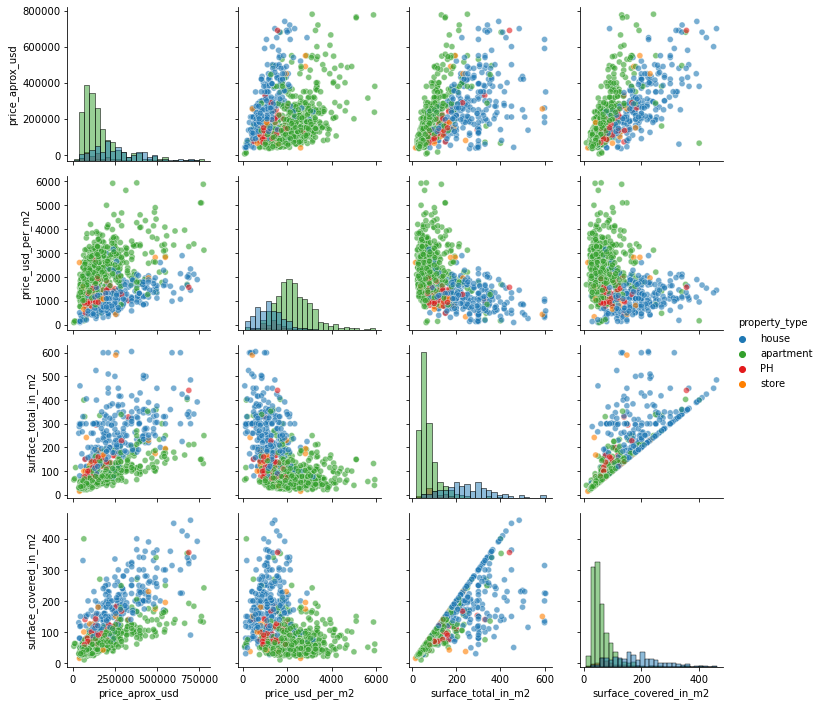

In [41]:
g4 = sns.PairGrid(data = data_precio_m2_acotado.sample(1000), hue='property_type', palette = palette[1:8:2] )
g4.map_diag(sns.histplot)
g4.map_offdiag(sns.scatterplot, alpha=0.6)
g4.add_legend()


In [42]:
# Se observan mas claras las relaciones.
# Se calcula cantidad de valores que se dropean retirando los outliers. 
# Se considera también el retiro de outliers de superificie. Ver límite 1500 m2.

# Datos definidos como outliers de 'price_usd_per_m2' y 'price_aprox_usd', se considera para el porcentaje 

print("Valores Sin NA en price_usd_per_m2: " , data['price_usd_per_m2'].notna().sum(), "\n",
      "Valores Sin NA en price_aprox_usd: " , data['price_aprox_usd'].notna().sum(), "\n",
      "Cantidad de valores sin outliers: " , len(data_precio_m2_acotado) ,"\n",
      "% de valores sin outliers respecto al total: " , 
      round(len(data_precio_m2_acotado)/data["price_usd_per_m2"].notna().sum()*100 ,2) , "\n",
     "limites considerados: Precio total {} usd, Precio por m2 {} usd".format(limite_precio,limite_precio_m2),"\n" )

Valores Sin NA en price_usd_per_m2:  68617 
 Valores Sin NA en price_aprox_usd:  100810 
 Cantidad de valores sin outliers:  56842 
 % de valores sin outliers respecto al total:  82.84 
 limites considerados: Precio total 790798.3 usd, Precio por m2 6291.0 usd 



##### Resultado parcial:
- Mismas filas con NA en columna price_aprox_usd y price_local_currency: No hace falta convertir local currency a USD
- Relaciones no intuitivas observadas en m2 vs precio: A menos superifcie cubierta, mayor costo. Esto se debe a que el tipo de propiedad de mayor precio son los departamentos, y que tienen menor superficie cubierta. 
- Se eliminará Local Currency.
- No es util reemplazar precios aprox USD con valores price usd per m2, ya que no aporta nuevos valores.
- Debido a que hay valores NA en precio usd per m2 y no en price per m2, es conveniente convertir a usd esos valores.
- Dropear outliers con límites definidos previamente, baja 12% de datos respecto al total.


<br>
<br>



# Análisis columnas: Regex para atributos adicionales, precio, m2, rooms

### "description" , "rooms" , 

<br>

---


In [43]:
#Aplicamos regex para obtener los precios desde la descripción
patron_price = "(?P<Currency>U\$S|USD|uSd|usD|usd|Usd|US\$|us\$|uS\$|Us\$)\$? ?(?P<Price>\d+(\,|\.)?\d+((\,|\.)\d+)?)"
regex_price = re.compile(patron_price, flags = re.IGNORECASE)
data_search = data['description'].apply(lambda x: x if x is np.NaN else regex_price.search(x))
data_search_not_null = data_search.notnull()
data.loc[data_search_not_null,'description_price'] = data_search[data_search_not_null].apply(lambda x : x.group('Price'))
data.loc[data_search_not_null,'description_currency'] = data_search[data_search_not_null].apply(lambda x : x.group('Currency'))

In [44]:
#Se filtra para no tener observaciones de descripciones nulas y 
# donde el precio es nulo para ver que impacto tiene la aplicación del regex.
A = data[ data.description_price.notnull() 
                     & data.price.isnull() ][['description',
                                                          'description_price', 
                                                          'description_currency',
                                                          'price']]

#Se filtran los valores que no traen el precio de alquileres.
B = (A[~A.description.str.contains('alq\w+')])

print(f'Número de observaciones: {B.shape[0]}' )
print(f'Total de observaciones: {data.shape[0]}' )
print(f'% a modificar: {round(B.shape[0]/data.shape[0]*100,4)}%' )
display (B)

#Se concluye que por el bajo número de observaciones y 
#el mix de resultados obtenidos (valores expresados en miles, con comas en miles, punto en decimales)
# no es razonable seguir involucrando esfuerzo en la limpieza.

Número de observaciones: 659
Total de observaciones: 121220
% a modificar: 0.5436%


,description,description_price,description_currency,price
263,CODIGO: ubicado en: TUCUMAN - Publicado por:...,240.000,u$s,NaN
662,CODIGO: 2007-100 ubicado en: DORREGO 3600 - P...,62,USD,NaN
664,CODIGO: ubicado en: [B.I 0527] VILLA GESELL -...,62,USD,NaN
1025,CODIGO: 1965-697-V ubicado en: M. SOLARI 3600 ...,75,USD,NaN
1029,CODIGO: 1965-698-V ubicado en: AZUL 3100 - Pu...,115,USD,NaN
...,...,...,...,...
120910,AMBIENTE DIVISIBLE CON PISOS D...,20.000,u$s,NaN
120911,AMBIENTE DIVISIBLE CON PISOS D...,20.000,u$s,NaN
120912,AMBIENTE DIVISIBLE CON PISOS D...,20.000,u$s,NaN
120913,AMBIENTE DIVISIBLE CON PISOS D...,20.000,u$s,NaN


In [45]:
#Observamos la composición de los nulos en la columna de los ambientes.
data["rooms_isnull"] = data["rooms"].isnull()
display (data.groupby(by="property_type").sum()["rooms_isnull"])

property_type
PH            2504
apartment    39797
house        27498
store         4031
Name: rooms_isnull, dtype: int64

In [46]:
#Aplicamos regex para obtener los ambientes desde la descripción
patron_rooms = "(?P<rooms>\d|Mono|mono|dos|Dos|DOS|tres|Tres|TRES|cuatro|Cuatro|CUATRO) ?(AMB|amb)"
regex_rooms = re.compile(patron_rooms, flags = re.IGNORECASE)
data_search = data['description'].apply(lambda x: x if x is np.NaN else regex_rooms.search(x))
data_search_not_null = data_search.notnull()
data.loc[data_search_not_null,'description_rooms'] = data_search[data_search_not_null].apply(lambda x : x.group('rooms'))
data['description_rooms'] = data['description_rooms'].replace(['MONO', 'Mono', 'mono'], 1) 
data['description_rooms'] = data['description_rooms'].replace(['dos','Dos', 'DOS'], 2) 
data['description_rooms'] = data['description_rooms'].replace(['tres','Tres','TRES'], 3) 
data['description_rooms'] = data['description_rooms'].replace(['cuatro','Cuatro', 'CUATRO'], 4) 

In [47]:
#Se filtra para no tener observaciones de descripciones nulas y donde la cantidad de ambientes es nulo para ver que impacto tiene la aplicación del regex.
C = data[ data.description_rooms.notnull() & data.rooms.isnull() ][['description', 'description_rooms', 'rooms']]

print(f'Número de observaciones: {C.shape[0]}' )
print(f'Total de observaciones: {data.shape[0]}' )
print(f'% a modificar: {round(C.shape[0]/data.shape[0]*100,4)}%' )
display (C)

Número de observaciones: 25238
Total de observaciones: 121220
% a modificar: 20.82%


,description,description_rooms,rooms
0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2,NaN
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2,NaN
3,PH 3 ambientes con patio. Hay 3 deptos en lote...,3,NaN
7,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,1,NaN
8,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,2,NaN
...,...,...,...
121139,"Condominio Royal Residence, espectacular empre...",3,NaN
121152,Monoambiente divisible en 3 piso al frente con...,1,NaN
121158,Excelente Ubicación - Avenida Pueyrredon y Las...,1,NaN
121217,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,1,NaN


In [48]:
#Creamos la columna con los ambientes obtenidos en regex
data['rooms_clean'] = data['rooms']
mask_rooms_null = data["rooms"].isnull()
data.loc[mask_rooms_null, "rooms_clean"] = data.loc[mask_rooms_null, "description_rooms"]

#Observamos reducción de nulls
print (data["rooms"].isnull().sum())
print (data["rooms_clean"].isnull().sum())
#Reemplazamos el resto con "No informa"
data.rooms_clean.fillna('0', inplace=True)
data["rooms_clean"] = data.rooms_clean.astype(int)
data.rooms_clean.replace(0, 'No informa', inplace=True)
data.rooms_clean.value_counts()


73830
48592


No informa    48618
2             19961
3             19507
1             12743
4             11758
5              4862
6              1729
7               891
8               425
10              226
9               198
11               72
12               65
13               33
14               27
15               26
17               16
16               11
20               11
22                8
18                6
21                5
19                4
30                4
25                4
32                3
23                2
24                1
31                1
29                1
27                1
28                1
Name: rooms_clean, dtype: int64

In [49]:
#Se fueron muestreando y analizando las descripciones de los outliers, suenan razonables
#ya que se venden propiedades con varios departamentos o edificios pero también hay casos
#donde se observa una incorreción en la carga por lo tanto al ser tan pocos casos se elige clasificarlos como "No informa" 

data_copy = data.copy()
data_copy.rooms_clean.replace('No informa', 0, inplace=True)
#print(* data_copy["description"][data_copy["rooms_clean"]==25], sep="\n\n")
print ( data_copy.rooms_clean.value_counts())

data.loc[data_copy["rooms_clean"]>11, "rooms_clean"] = 'No informa'

print ( data.rooms_clean.value_counts())

0     48618
2     19961
3     19507
1     12743
4     11758
5      4862
6      1729
7       891
8       425
10      226
9       198
11       72
12       65
13       33
14       27
15       26
17       16
16       11
20       11
22        8
18        6
21        5
19        4
30        4
25        4
32        3
23        2
24        1
31        1
29        1
27        1
28        1
Name: rooms_clean, dtype: int64
No informa    48848
2             19961
3             19507
1             12743
4             11758
5              4862
6              1729
7               891
8               425
10              226
9               198
11               72
Name: rooms_clean, dtype: int64


In [50]:
tabla_rooms = data[['description','rooms_clean']].head(10)
print(tabla_rooms)

                                         description rooms_clean
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...           2
1  Venta de departamento en décimo piso al frente...  No informa
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...           2
3  PH 3 ambientes con patio. Hay 3 deptos en lote...           3
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...  No informa
5  Casa en el perímetro del barrio 338, ubicada e...  No informa
6  MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...  No informa
7  EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...           1
8  EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER...           2
9  MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...  No informa


In [51]:
#Aplicamos regex para obtener los pisos desde la descripción
patron_floor = "(?P<floor>\d+|primer|Primer|PRIMER|primero|Primero|PRIMERO|segunda|Segunda|SEGUNDA|segundo|Segundo|SEGUNDO|tercer|Tercer|TERCER|cuarto|Cuarto|CUARTO|quinto|Quinto|QUINTO|sexto|Sexto|SEXTO|septimo|Septimo|SEPTIMO|octavo|Octavo|OCTAVO) ?(PISO|piso|PLANTA|planta)"
regex_floor = re.compile(patron_floor, flags = re.IGNORECASE)
data_search = data['description'].apply(lambda x: x if x is np.NaN else regex_floor.search(x))
data_search_not_null = data_search.notnull()
data.loc[data_search_not_null,'description_floors'] = data_search[data_search_not_null].apply(lambda x : x.group('floor'))
data['description_floors'] = data['description_floors'].replace(['primero',
                                                                 'Primero',
                                                                 'PRIMERO',
                                                                 'primer',
                                                                 'Primer',
                                                                 'PRIMER'], 1) 
data['description_floors'] = data['description_floors'].replace(['segundo',
                                                                 'Segundo',
                                                                 'SEGUNDO',
                                                                 'segunda',
                                                                 'Segunda',
                                                                 'SEGUNDA'], 2) 
data['description_floors'] = data['description_floors'].replace(['tercer',
                                                                 'Tercer',
                                                                 'TERCER',
                                                                 'TErcer'], 3) 
data['description_floors'] = data['description_floors'].replace(['cuarto',
                                                                 'Cuarto',
                                                                 'CUARTO'], 4) 
data['description_floors'] = data['description_floors'].replace(['quinto',
                                                                 'Quinto',
                                                                 'QUINTO'], 5) 
data['description_floors'] = data['description_floors'].replace(['sexto',
                                                                 'Sexto',
                                                                 'SEXTO'], 6) 
data['description_floors'] = data['description_floors'].replace(['septimo',
                                                                 'SEPTIMO',
                                                                 'Septimo'], 7) 
data['description_floors'] = data['description_floors'].replace(['octavo',
                                                                 'Octavo',
                                                                 'OCTAVO'], 8) 
data['description_floors'] = data['description_floors'].replace('', 0) 

KeyboardInterrupt: 

In [ ]:
#Se filtra para no tener observaciones de descripciones nulas y donde la cantidad de ambientes es nulo para ver que impacto tiene la aplicación del regex.
D = data[ data.description_floors.notnull() & data.floor.isnull() ][['description', 'description_floors', 'floor']]

print(f'Número de observaciones: {D.shape[0]}' )
print(f'Total de observaciones: {data.shape[0]}' )
print(f'% a modificar: {round(D.shape[0]/data.shape[0]*100,4)}%' )
D['description_floors'] = D['description_floors'].astype(str)
D['description_floors'].value_counts()

Número de observaciones: 17403
Total de observaciones: 121220
% a modificar: 14.3565%


2       5013
1       3828
3       1746
4        861
8        841
        ... 
200        1
2363       1
8080       1
63         1
3255       1
Name: description_floors, Length: 194, dtype: int64

In [ ]:
#Creamos la columna con los floor obtenidos en regex
data['floor_clean'] = data['floor']
mask_floor_null = data["floor"].isnull()
data.loc[mask_floor_null, "floor_clean"] = data.loc[mask_floor_null, "description_floors"]

#Observamos reducción de nulls
print (data["floor"].isnull().sum())
print (data["floor_clean"].isnull().sum())
#Reemplazamos el resto con "No informa"
data.floor_clean.fillna('0', inplace=True)
data["floor_clean"] = data.floor_clean.astype(int)
data.floor_clean.replace(0, 'No informa', inplace=True)
data.floor_clean.value_counts()


113321
95918


No informa    95958
2              6560
1              5913
3              2660
4              1519
              ...  
1211              1
1562242697        1
1606              1
3800              1
3255              1
Name: floor_clean, Length: 308, dtype: int64

In [ ]:
#Dado que los edificios más altos en Argentina tienen 27 pisos (Fuente="https://es.wikipedia.org/wiki/Anexo:Edificios_m%C3%A1s_altos_de_Argentina")
#los que superen ese limite se clasifican como "No informa" 

data_copy = data.copy()
data_copy.floor_clean.replace('No informa', 0, inplace=True)
print ( data_copy.floor_clean.value_counts())

data.loc[data_copy["floor_clean"]>27, "floor_clean"] = 'No informa'

print ( data.floor_clean.value_counts())

0             95958
2              6560
1              5913
3              2660
4              1519
              ...  
1211              1
1562242697        1
1606              1
3800              1
3255              1
Name: floor_clean, Length: 308, dtype: int64
No informa    96665
2              6560
1              5913
3              2660
4              1519
8              1089
6              1054
5               965
10              858
7               811
9               794
12              543
14              496
11              282
13              265
15              164
18              104
24               84
17               72
16               59
20               59
19               45
22               43
21               41
26               25
27               21
25               19
23               10
Name: floor_clean, dtype: int64


In [ ]:
#Dado el alto número de NA en expenses decidimos volverla una variable booleana que determina si tiene o no expensas.
data['with_expenses 1'] = data['expenses'].fillna(0)>0
data['with_expenses 2'] = data.description.str.contains('expensa')
data['with_expenses 3'] = data.description.str.contains('sin expensa|no expensa' , na=False)
data['with_expenses'] = ((data['with_expenses 1']) | ((~data['with_expenses 3']) & data['with_expenses 2']))
data['with_expenses']

0         False
1         False
2         False
3         False
4         False
          ...  
121215     True
121216     True
121217    False
121218    False
121219     True
Name: with_expenses, Length: 121220, dtype: bool

In [ ]:
data['with_expenses'].value_counts()

False    100601
True      20619
Name: with_expenses, dtype: int64

In [ ]:
data_description_with_floor = data.description.str.contains('piso|planta' , na=False)
data.description[data_description_with_floor].shape[0]/data.description.shape[0]

0.4292031017983831

In [ ]:
#Agregamos columnas que identifican la existencia de determinados amenities
data_description_with_pool = data.description.str.contains('pileta|piscina|alberca')
data ['pool'] = data_description_with_pool
data_description_with_Terrace = data.description.str.contains('terraza')
data ['terrace'] = data_description_with_Terrace
data_description_with_Balcony_or_yard  = data.description.str.contains('balcon|patio')
data ['balcony_or_yard'] = data_description_with_Balcony_or_yard
data_description_with_grill  = data.description.str.contains('parrilla|asador')
data ['grill'] = data_description_with_grill
data_description_with_underfloor_heating  = data.description.str.contains('radiante|calefacción central')
data ['underfloor_heating'] = data_description_with_underfloor_heating
data_garage  = data.description.str.contains('cochera|garage|garaje|estacionamiento|aparcamiento')
data['Garage'] = data_garage
amenities = ['Garage' ,
             'underfloor_heating' ,
             'grill' ,
             'balcony_or_yard' ,
             'terrace' ,
             'pool']

In [ ]:
display (data[amenities].head(10))

,Garage,underfloor_heating,grill,balcony_or_yard,terrace,pool
0,False,False,False,False,False,False
1,True,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,False,False
5,False,False,False,True,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


USD    3207
ARS     536
Name: currency, dtype: int64

<AxesSubplot:ylabel='Frequency'>

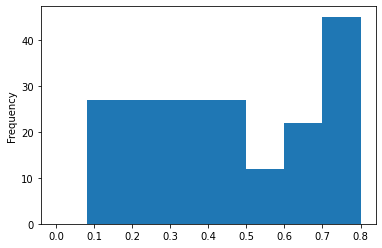

In [ ]:
#Analizamos la posibilidad de que haya alquileres catalogados como ventas
dataalq = (data[ ( data["description"].notnull() & data.description.str.contains('alq\w+'))])
display ( dataalq.currency.value_counts() )
A = dataalq['price'][dataalq['currency']=='ARS']/1000000
A.plot(kind='hist', bins=[0,0.05,0.08,0.5,0.6,0.7,0.8])

<AxesSubplot:ylabel='Frequency'>

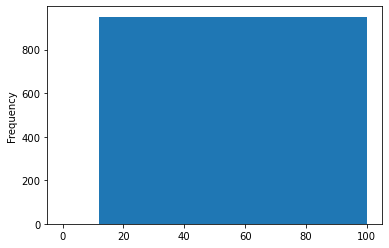

In [ ]:
B = dataalq['price'][dataalq['currency']=='USD']/1000
B.plot(kind='hist', bins=[0,4,8,12,100])
#Concluimos que hay valores en ARS que estarían debajo de los 10kusd
#por lo que los dropearemos por considerarlos alquileres, este analisis luego extenderemos a todos los precios.

##### Resultado parcial:
- % a modificar en columna ROOMS : 19%
- No es útil realizar extracción de datos de precios. Bajo porcentaje.
- Se generan nuevas columnas con atributos de cada propiedad (pileta, terraza , etc).


<br>
<br>



# Análisis columnas: Geolocalización - Evaluación ubicaciones

### "place_name" , "place_with_parent_names" , "country_name" , 
### "state_name" , "lat-lon" , "lat" , "lon" , "geonames_id"

<br>

---


In [ ]:
'''Las columnas 'lat' y 'lon' tienen la misma cantidad de NaNs que 'lat-lon' así que no puedo extraer
información de ahí. Pero puedo intentar extraer la información geográfica de la columna 'place_name'.
Primero evalúo qué hacer con los 23 NaN de 'place_name'.'''
print('Cantidad de NaNs en place_name:', data['place_name'].isna().sum())
mask_no_place = data['place_name'].isna()
data.loc[mask_no_place, 'place_with_parent_names'].value_counts()
  

Cantidad de NaNs en place_name: 23


|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    23
Name: place_with_parent_names, dtype: int64

In [ ]:
# Como todas las filas corresponden a Tigre le asigno ese falor
data['place_name'] = data['place_name'].fillna('Tigre')

In [ ]:
# Quiero verificar que los datos en place_name coincidan con place_with_parent_names
data['place_name_parent'] = data.apply(lambda x: x['place_with_parent_names'].split('|')[-2], axis = 1)
mask_diff_place_name = data['place_name_parent'] != data['place_name']
data.loc[mask_diff_place_name, 'place_with_parent_names'].value_counts()

|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    23
Name: place_with_parent_names, dtype: int64

In [ ]:
'''No se computaron 23 valores de 'place_name_parent' porque 'place_with_parent_names' tiene doble ||
en vez de un sólo |'''
data.loc[data[mask_diff_place_name].index, 'place_name_parent'] = 'Tigre'
# Ahora sí comparo y veo que no hay diferencia
(data['place_name'] != data['place_name_parent']).sum()

0

In [ ]:
# Quiero separar los datos por provincia y eliminar aquellas que tengan pocos registros
data['province'] = data.apply(lambda x: x['place_with_parent_names'].split('|')[2], axis = 1)
province_group = data.groupby('province')
province_group['province'].count().sort_values(ascending = False)

province
Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La 

In [ ]:
# Elimino las provincias que tengan menos de 1000 registros
data_province_filtered = province_group.filter(lambda grp: grp['province'].count() > 1000)
data_province_filtered['province'].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Name: province, dtype: int64

In [ ]:
''' Se evalúa extraer información de la columna 'geonames_id', primero se verá
el porcentaje de columnas 'lat' que sean NaN y que tienen información en 'geonames_id'.'''
mask_lat_nan_and_geonames_notnan = data['lat'].isna() & data['geonames_id'].notna()

print('El porcentaje de lat NaNs y que contienen información en geonames_id es: %',
      round(mask_lat_nan_and_geonames_notnan.sum() * 100 / mask_lat_nan_and_geonames_notnan.shape[0], 2)
     )

El porcentaje de lat NaNs y que contienen información en geonames_id es: % 35.77


In [ ]:
# Genero un DataFrame apartir del archivo txt que proporciona la API y lo limpio
# Fuente: http://www.geonames.org/search.html?q=&country=AR

data_geonames = pd.read_csv('./data/AR.txt', header = None, sep = '\t')
data_geonames = data_geonames[[0, 1, 4, 5, 17]]
data_geonames = data_geonames.rename(columns = {0 :  'geonames_id',
                                                1 : 'localidad_API',
                                                4 : 'lat_API',
                                                5 : 'lon_API',
                                                17 : 'place_parent_names_API'})
data_geonames['place_name_API'] = data_geonames['place_parent_names_API'].apply(lambda x: 
                                x if x is np.nan else x[x.rfind('/') + 1:])
data_geonames['place_name_API'] = data_geonames['place_name_API'].apply(lambda x: 
                                x if x is np.nan else x.replace('_', ' '))
display(data_geonames.head(3))
print(data_geonames.shape)

,geonames_id,localidad_API,lat_API,lon_API,place_parent_names_API,place_name_API
0,3427200,Sierra del 15,-37.96613,-57.94670,America/Argentina/Buenos_Aires,Buenos Aires
1,3427201,Puesto 1 Napoleón Cué,-28.63333,-56.11667,America/Argentina/Cordoba,Cordoba
2,3427202,Cañada del Zorro,-32.16667,-59.50000,America/Argentina/Cordoba,Cordoba


(49673, 6)


In [ ]:
''' Como se esta usando la version gratuita de la API algunos datos vienen incompletos y no ofrece todo los decimales de
la longitud y la latitud. Se va a preservar de todos modos esos datos ya que en todos los casos incluye aunque sea
un decimal, y esa precisión es suficiente para indicar la ciudad. Se dejará el código que simularía el filtrado
de datos de acuerdo a la cantidad de decimales que uno elija. Precisión de acuerdo a los decimales:
1 decimal = Gran ciudad
2 decimales = Pequeño pueblo
3 decimales = Barrio
4 decimales = Calle
5 decimales = Casa
'''
display(data_geonames.head(3))
# Elegir cantidad de decimales
cdad_decimales = 2
# Cada latitud y longitud posee 4 caracteres antes de los decimales
total_decimales = 4 + cdad_decimales
mask_decimales_lat = data_geonames.apply(lambda x: len(str(x['lat_API']).rstrip('0')) >= total_decimales, axis = 1)
mask_decimales_lon = data_geonames.apply(lambda x: len(str(x['lon_API']).rstrip('0')) >= total_decimales, axis = 1)
mask_decimales = mask_decimales_lat & mask_decimales_lon
# Observar que desaparece el Cañada del Zorro que poseía 1 solo decimal en su longitud
data_geonames[mask_decimales].head(3)

# Esta modificación no afecta el DataFrame con el que vamos a seguir trabajando

,geonames_id,localidad_API,lat_API,lon_API,place_parent_names_API,place_name_API
0,3427200,Sierra del 15,-37.96613,-57.94670,America/Argentina/Buenos_Aires,Buenos Aires
1,3427201,Puesto 1 Napoleón Cué,-28.63333,-56.11667,America/Argentina/Cordoba,Cordoba
2,3427202,Cañada del Zorro,-32.16667,-59.50000,America/Argentina/Cordoba,Cordoba


,geonames_id,localidad_API,lat_API,lon_API,place_parent_names_API,place_name_API
0,3427200,Sierra del 15,-37.96613,-57.94670,America/Argentina/Buenos_Aires,Buenos Aires
1,3427201,Puesto 1 Napoleón Cué,-28.63333,-56.11667,America/Argentina/Cordoba,Cordoba
3,3427203,Estancia Zorraquín,-31.51553,-58.55208,America/Argentina/Cordoba,Cordoba


In [ ]:
# Hago un merge entre el DataFrame de las propiedades y el de la API
data_merge = data_province_filtered.merge(data_geonames, how = 'left', on = 'geonames_id')
data_merge.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,grill,underfloor_heating,Garage,place_name_parent,province,localidad_API,lat_API,lon_API,place_parent_names_API,place_name_API
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,False,False,False,Mataderos,Capital Federal,Mataderos,-34.66667,-58.5,America/Argentina/Buenos_Aires,Buenos Aires
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,False,False,True,La Plata,Bs.As. G.B.A. Zona Sur,Partido de La Plata,-35.00000,-58.0,America/Argentina/Buenos_Aires,Buenos Aires


In [ ]:
# Observo la cantidad de NaNs en el DataFrame mergeado
round(data_merge.isna().sum() * 100 / data_merge.shape[0], 2)

Unnamed: 0                     0.00
operation                      0.00
property_type                  0.00
place_name                     0.00
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
geonames_id                   16.01
lat-lon                       42.04
lat                           42.04
lon                           42.04
price                         15.45
currency                      15.45
price_aprox_local_currency    15.45
price_aprox_usd               15.45
surface_total_in_m2            9.56
surface_covered_in_m2         15.34
price_usd_per_m2              42.41
price_per_m2                  26.08
floor                         93.42
rooms                         60.50
expenses                      87.96
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.46
Price_USD                     15.45
description_price           

In [ ]:
# Evalúo qué porcentaje de los datos del DataFrame original son NaN y tienen valores en el de la API
print('El porcentaje de los datos del DataFrame original son NaN y tienen valores en el de la API es: %', \
round((data_merge['lat-lon'].isna() & data_merge['lat_API'].notna()).sum() * 100 / data_merge.shape[0], 2))

El porcentaje de los datos del DataFrame original son NaN y tienen valores en el de la API es: % 34.92


In [ ]:
# Remplazo los valores del Dataset original con valores NaN por los de la columna lon/lat_API
data_merge['lat_ampliada'] = data_merge.apply(lambda x: x['lat_API'] if np.isnan(x['lat']) else x['lat'], axis = 1)
data_merge['lon_ampliada'] = data_merge.apply(lambda x: x['lon_API'] if np.isnan(x['lon']) else x['lon'], axis = 1)
# Evalúo el porcentaje de NaNs
round(data_merge[['lat_ampliada', 'lon_ampliada']].isna().sum() * 100 / data_merge.shape[0], 2)

lat_ampliada    7.12
lon_ampliada    7.12
dtype: float64

In [ ]:
'''Una forma posible de proceder con los NaN de latitud y longitud es eliminarlos, pero se va a preservar ya que todavía no
se esta operando sobre ellos (sólo limpiándolos), no se puede definir un criterio que me permita establecer qué hacer con ellos'''
# data_merge = data_merge.dropna(subset = ['lat_ampliada', 'lon_ampliada'])
data_merge = data_merge.dropna(subset = ['lat_ampliada', 'lon_ampliada'])

In [ ]:
#Se realiza merge para llevar los datos de geolocalización al dataset principal.
data = pd.merge(data, data_merge[['Unnamed: 0', 'lat_ampliada', 'lon_ampliada']], on='Unnamed: 0', how='right')

In [ ]:
''' El número de NaNs en las columnas de lat y lon original pudo ser considerablemente disminuido
en las columnas de lat_ampliada y lon_ampliada, así que las agrego al GeoDataFrame'''
geo_data = gpd.GeoDataFrame(data_merge, geometry = gpd.points_from_xy(data_merge['lon_ampliada'],
                                                                      data_merge['lat_ampliada']))

In [ ]:
''' Se verifica si los datos geográficos son correctos.
A partir de descargar los polígonos de los Municipios y Barrios para ver si contienen 
al punto geográfico de geomtry y conincide con la columna 'place_name'.'''
# Fuente:  https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG
data_municipios_arg = pd.read_csv('./data/municipio.csv')
data_municipios_arg = data_municipios_arg[['nam', 'geom']]
data_municipios_arg = data_municipios_arg.rename(columns = {'nam': 'municipio/barrio', 'geom': 'WKT'})
data_municipios_arg['WKT'] = data_municipios_arg['WKT'].apply(loads)
geo_municipios = gpd.GeoDataFrame(data_municipios_arg, geometry = 'WKT')

In [ ]:
# Fuente: https://data.buenosaires.gob.ar/dataset/barrios
data_barrios = pd.read_csv("./data/barrios.csv", encoding='latin1')
data_barrios = data_barrios[['BARRIO', 'WKT']]
data_barrios = data_barrios.rename(columns = {'BARRIO': 'municipio/barrio'})
data_barrios['municipio/barrio'] = data_barrios['municipio/barrio'].apply(lambda x: capwords(x))
data_barrios['WKT'] = data_barrios['WKT'].apply(loads) 
geo_barrios = gpd.GeoDataFrame(data_barrios, geometry = 'WKT')

In [ ]:
geo_municipios_barrios = pd.concat([geo_municipios, geo_barrios])
geo_data_merge = geo_data.merge(geo_municipios_barrios, how = 'left', left_on = 'place_name', right_on = 'municipio/barrio')
print(geo_data_merge['municipio/barrio'].isna().sum())
'''Hubo poca coincidencia cuando se realizo el merge con la columna 'place_name' ya que no es muy específica
y probablemente algunas coincidencias se encuentren en diferentes índices entre los pipes de 
'place_with_parent_names', limpiar esos datos sería muy trabajoso y no vale la pena. Por eso
quizás sería mejor verificar si el dato geográfico es correcto utilizando la columna 'state_name'.'''

35924


"Hubo poca coincidencia cuando se realizo el merge con la columna 'place_name' ya que no es muy específica\ny probablemente algunas coincidencias se encuentren en diferentes índices entre los pipes de \n'place_with_parent_names', limpiar esos datos sería muy trabajoso y no vale la pena. Por eso\nquizás sería mejor verificar si el dato geográfico es correcto utilizando la columna 'state_name'."

In [ ]:
# Esta función cambia el nombre de la Provincia para poder hacer el Merge correctamente entre el GeoDataFrame original
# y el dataset que contiene los polígonos de cada provincia

def change_state_name(name):
    if name == 'Bs.As. G.B.A. Zona Norte' or name == 'Bs.As. G.B.A. Zona Sur' \
    or name == 'Bs.As. G.B.A. Zona Oeste' or name == 'Buenos Aires Costa Atlántica' \
    or name == 'Buenos Aires Costa Atlántica' or name == 'Buenos Aires Interior':
        return 'Buenos Aires'
    elif name == 'Capital Federal':
        return 'Ciudad Autónoma de Buenos Aires'
        
    else:
        return name

In [ ]:
# Aplico la función
geo_data_merge['state_name_official'] = geo_data_merge['state_name'].apply(change_state_name)

In [ ]:
# Genero el GeoDataFrame con los polígonos de las provincias de Argentina
# Fuente: https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG
data_provincias = pd.read_csv('./data/provincia.csv')
data_provincias = data_provincias[['nam', 'geom']]
data_provincias = data_provincias.rename(columns = {'nam': 'provincia', 'geom': 'WKT'})
data_provincias['WKT'] = data_provincias['WKT'].apply(loads)
geo_provincias = gpd.GeoDataFrame(data_provincias, geometry = 'WKT')

In [ ]:
# Realizo el Merge entre el GeoDataFrame original y el de los polígonos de las provincias
geo_data_merge = geo_data_merge.merge(geo_provincias, how = 'left',  \
                                      left_on = 'state_name_official', right_on = 'provincia')

In [ ]:
# Evalúo cuántos datos de punto se encuentran correctamente dentro del polígono de Provincia
''' Como el tipo de dato Polygon es muy pesado y hay muchos registros la función para verificar si el punto se
encuentra dentro del polígono tomo mucho tiempo (apróximadamente 6hs). Se pueden cargar directamente los resultados
de dicha operación a través de un csv.
ADVERTENCIA: La ejecución de esta celda toma varias horas en completarse
Instalar la lirería tqdm: conda install -c conda-forge tqdm

tqdm.pandas()
geo_data_merge['point_inside_poligon'] = geo_data_merge.progress_apply(lambda x: x['WKT_y'].contains(x['geometry']), axis = 1)
data_export = geo_data_merge.loc[:, ['Unnamed: 0', 'point_inside_poligon']]
data_export.to_csv('.\data\point_inside_poligon_province.csv')'''


" Como el tipo de dato Polygon es muy pesado y hay muchos registros la función para verificar si el punto se\nencuentra dentro del polígono tomo mucho tiempo (apróximadamente 6hs). Se pueden cargar directamente los resultados\nde dicha operación a través de un csv.\nADVERTENCIA: La ejecución de esta celda toma varias horas en completarse\nInstalar la lirería tqdm: conda install -c conda-forge tqdm\n\ntqdm.pandas()\ngeo_data_merge['point_inside_poligon'] = geo_data_merge.progress_apply(lambda x: x['WKT_y'].contains(x['geometry']), axis = 1)\ndata_export = geo_data_merge.loc[:, ['Unnamed: 0', 'point_inside_poligon']]\ndata_export.to_csv('.\\data\\point_inside_poligon_province.csv')"

In [ ]:
# Leo los datos del resultado de la operación apply de la celda de arriba
# que contiene la información de los puntos correcamente contenidos en el polígono
data_province_point_in_poligon = pd.read_csv('data\point_inside_poligon_province.csv')
geo_data_merge = geo_data_merge.merge(data_province_point_in_poligon, how = 'left', on = 'Unnamed: 0')
geo_data_merge.head(1)
print('Porcentaje de puntos ubicados correctamente dentro del polígono de provincia: %', \
     (geo_data_merge['point_inside_poligon'].sum() / geo_data_merge.shape[0]))

Porcentaje de puntos ubicados correctamente dentro del polígono de provincia: % 0.9971726963245052


<AxesSubplot:>

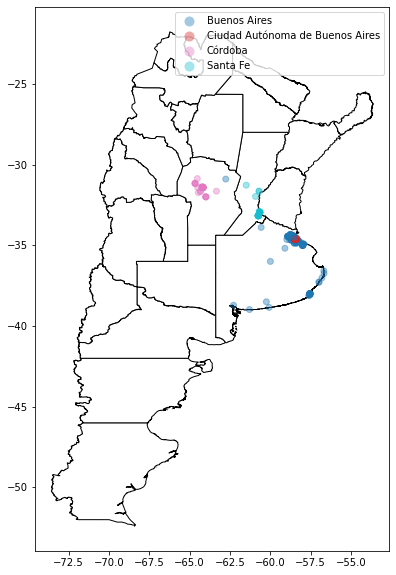

In [ ]:
# Voy a verificar de forma gráfica dónde se ubican los puntos que no coinciden 
# con los polígonos de provincia
mask_wrong_points = geo_data_merge['point_inside_poligon'] == False
wrong_points_province = geo_data_merge[mask_wrong_points]
province_list = list(geo_data_merge['state_name_official'].unique())
mask_provincias = geo_provincias['provincia'].apply(lambda x: True if x in province_list else False)
provincias_seleccionadas = geo_provincias[mask_provincias]
# Elimino a Tierra del Fuego y la Antártida para que el mapa se vea mejor
provincias_sin_antartida = geo_provincias[geo_provincias['provincia'] 
                                          != 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']

fig5 = plt.figure(figsize = (10, 10))
ax = plt.axes()
provincias_sin_antartida.plot(ax = ax, color ='white', edgecolor='black')
wrong_points_province.plot(ax = ax, alpha = 0.4, column = 'state_name_official', legend = province_list)

# Observamos que en su gran mayoría los puntos se encuentran en los límites
# dentro del polígono de provincia y por eso figuran como equivocados
# El polígono de Córdoba no parece ser correcto ya que los puntos se
# encuentran en el centro

In [ ]:
# Voy a hacer lo mismo para ver si los puntos geográficos están correctamente dentro de los polígonos de los barrios de CABA
mask_caba = geo_data_merge['state_name'] == 'Capital Federal'
# Voy a trabajar solo sobre las filas de CABA
geo_data_merge_caba = geo_data_merge[mask_caba]
geo_barrios = geo_barrios.rename(columns = {'municipio/barrio': 'barrio'})
# Uno el GeoDataFrame con las filas de CABA con el de los barrios de CABA
geo_data_merge_caba = geo_data_merge_caba.merge(geo_barrios, how = 'left', left_on = 'place_name', right_on = 'barrio')
# Evalúo cuántos barrios no se mergearon correctamente
geo_data_merge_caba['WKT'].isna().sum()

5575

In [ ]:
# El número es muy alto, y no vale la pena limpiar los datos, 
# así que sólo para probar voy a evaluar si los datos de los polígonos
# que no son NaN contienen al punto geográfico
mask_caba_notnan = geo_data_merge_caba['WKT'].notna()
geo_data_merge_caba_notna = geo_data_merge_caba[mask_caba_notnan]
geo_data_merge_caba_notna['point_inside_poligon'] = geo_data_merge_caba_notna.apply(lambda x: x['WKT'].contains(x['geometry']),
                                                                                    axis = 1)
print('Porcentaje puntos contenidos correctamente dentro del polígono: %',\
      round(geo_data_merge_caba_notna['point_inside_poligon'].sum() * 100 / geo_data_merge_caba_notna.shape[0], 2))

Porcentaje puntos contenidos correctamente dentro del polígono: % 83.26


C:\Anaconda3\envs\DH\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
# Indicar un barrio en la variable para ver gráficamente los datos que no están correctamente 
# contenidos en el polígono
barrio = 'Palermo'
# Las opciones son:
print(geo_barrios['barrio'].values)

['Chacarita' 'Paternal' 'Villa Crespo' 'Villa Del Parque' 'Almagro'
 'Caballito' 'Villa Santa Rita' 'Monte Castro' 'Villa Real' 'Flores'
 'Floresta' 'Constitucion' 'San Cristobal' 'Boedo' 'Velez Sarsfield'
 'Villa Luro' 'Parque Patricios' 'Mataderos' 'Villa Lugano' 'San Telmo'
 'Saavedra' 'Coghlan' 'Villa Urquiza' 'Colegiales' 'Balvanera'
 'Villa Gral. Mitre' 'Parque Chas' 'Agronomia' 'Villa Ortuzar' 'Barracas'
 'Parque Avellaneda' 'Parque Chacabuco' 'Nueva Pompeya' 'Palermo'
 'Villa Riachuelo' 'Villa Soldati' 'Villa Pueyrredon' 'Villa Devoto'
 'Liniers' 'Versalles' 'Puerto Madero' 'Monserrat' 'San Nicolas'
 'Belgrano' 'Recoleta' 'Retiro' 'Nuñez' 'Boca']


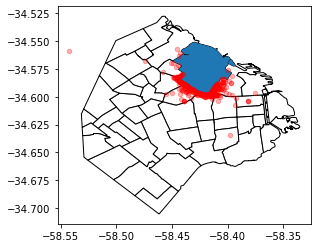

In [ ]:
# Realizo también una verificación gráfica de los puntos que no se encuentran correctamente contenidos en el polígono del barrio
mask_wrong_points = np.logical_and(geo_data_merge_caba_notna['place_name'] == barrio,\
                                   geo_data_merge_caba_notna['point_inside_poligon'] == False)
wrong_ponits = geo_data_merge_caba_notna[mask_wrong_points]
%matplotlib inline
fig6 = plt.figure()
ax = plt.axes()
geo_barrios.plot(ax = ax, color = 'white', edgecolor = 'black')
geo_barrios.loc[geo_barrios['barrio'] == barrio, 'WKT'].plot(ax = ax)
wrong_ponits.plot(ax =  ax, color = 'red', markersize= 20, alpha = 0.3)
plt.show()

# Se observa que la gran mayoría de los puntos se encuentran en las cercanías del límite exacto del barrio

In [ ]:
# Voy a medir a cuánta distancia está cada punto de una estación de subte para evaluar si eso influye en el precio
data_subte = pd.read_csv('data/estaciones-de-subte.csv')
geo_subte = gpd.GeoDataFrame(data_subte, geometry = gpd.points_from_xy(data_subte['long'], data_subte['lat']))
geo_subte.head(2)

,long,lat,id,estacion,linea,geometry
0,-58.398928,-34.635750,1.0,CASEROS,H,POINT (-58.39893 -34.63575)
1,-58.400970,-34.629376,2.0,INCLAN - MEZQUITA AL AHMAD,H,POINT (-58.40097 -34.62938)


In [ ]:
''' Se evalua la distancia del punto de cada casa a la estación de subte más cercana.
ADVERTENCIA: La ejecución de desta celda demora varios minutos, los resultados de dicha
operación se encuentran en el csv a continuación

# conda install -c conda-forge tqdm
tqdm.pandas()
geo_data_merge_caba_notna['distance_subway'] = geo_data_merge_caba_notna.progress_apply(lambda x: np.NaN if x['geometry'] is np.NaN \
                   else min([int(geodesic((x['geometry'].x,  x['geometry'].y), (point_station.x, point_station.y)).meters) \
                    for point_station in geo_subte['geometry']]),axis = 1)
data_export2 = geo_data_merge_caba_notna.loc[:, ['Unnamed: 0', 'distance_subway']]
data_export2.to_csv('data\distancia_subte.csv')
'''

" Se evalua la distancia del punto de cada casa a la estación de subte más cercana.\nADVERTENCIA: La ejecución de desta celda demora varios minutos, los resultados de dicha\noperación se encuentran en el csv a continuación\n\n# conda install -c conda-forge tqdm\ntqdm.pandas()\ngeo_data_merge_caba_notna['distance_subway'] = geo_data_merge_caba_notna.progress_apply(lambda x: np.NaN if x['geometry'] is np.NaN                    else min([int(geodesic((x['geometry'].x,  x['geometry'].y), (point_station.x, point_station.y)).meters)                     for point_station in geo_subte['geometry']]),axis = 1)\ndata_export2 = geo_data_merge_caba_notna.loc[:, ['Unnamed: 0', 'distance_subway']]\ndata_export2.to_csv('data\\distancia_subte.csv')\n"

In [ ]:
# Se leen los datos del apply de la celda superior que fueron cargados en un .csv
# que contienen la distancia de cada punto a una estación de subte
data_distancia_subte = pd.read_csv('data\distancia_subte.csv')
geo_data_merge_caba_notna = geo_data_merge_caba_notna.merge(data_distancia_subte, how = 'left', on = 'Unnamed: 0')

In [ ]:
# Se separa los datos en 4 categorías de acuerdo a cercanía o lejanía de la estación
geo_data_merge_caba_notna['distance_subway_discrete'], dist_bins = pd.qcut(geo_data_merge_caba_notna['distance_subway'],\
                                         q = 4, labels = ['muy_cerca', 'cerca', 'lejos', 'muy_lejos'], retbins = True)
print('Los cuartiles de ditancia son:', list(dist_bins))

Los cuartiles de ditancia son: [1.0, 242.0, 484.0, 798.0, 607904.0]


In [ ]:
# Trabajo sólo con los barrios que poseen estaciones de subte para
# poder visualizar los datos más fácilmente
# Fuente: https://es.wikipedia.org/wiki/Anexo:Estaciones_de_Subte_de_Buenos_Aires
data_barrios_con_subte = pd.read_csv('data/barrios_con_subte.csv')
barrios_con_subte = list(data_barrios_con_subte['Barrio'].unique())
geo_data_merge_caba_notna['barrio_con_subte'] = geo_data_merge_caba_notna.apply(lambda x:\
                            True if x['place_name'] in barrios_con_subte else False, axis = 1)
mask_barrios_con_subte = geo_data_merge_caba_notna['barrio_con_subte'] == True

In [ ]:
# Agrupo por barrio y evalúo si hay una relación entre la cercanía a la estación
# y el precio de la propiedad
group_barrio = geo_data_merge_caba_notna[mask_barrios_con_subte].groupby(['place_name', 'distance_subway_discrete'])
group_barrio['price'].median().head(28)

# Probar por metro cuadrado
# No se observa una clara relación entre la cercanía a la estación de subte y el precio

place_name  distance_subway_discrete
Almagro     muy_cerca                   156500.0
            cerca                       154000.0
            lejos                       169900.0
            muy_lejos                   159000.0
Balvanera   muy_cerca                   115000.0
            cerca                       140000.0
            lejos                       105000.0
            muy_lejos                   123500.0
Belgrano    muy_cerca                   200000.0
            cerca                       259000.0
            lejos                       204000.0
            muy_lejos                   197500.0
Boedo       muy_cerca                   369840.0
            cerca                       524284.0
            lejos                       244500.0
            muy_lejos                   523648.0
Caballito   muy_cerca                   134150.0
            cerca                       152000.0
            lejos                       158000.0
            muy_lejos           

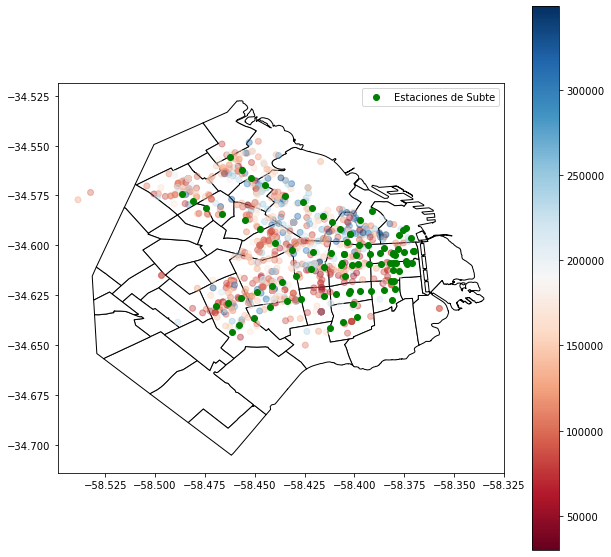

In [ ]:
# Evalúo de forma gráfica si hay una relación entre el precio y la cercanía a las estaciones de subte
sample_size = 1000
mask_barrios_con_subte_precio_limitado = np.logical_and\
(geo_data_merge_caba_notna['barrio_con_subte'] == True, geo_data_merge_caba_notna['price'] < 350000)
sample = geo_data_merge_caba_notna[mask_barrios_con_subte_precio_limitado].sample(sample_size)
fig7 = plt.figure(figsize = (10, 10))
ax = plt.axes()
geo_barrios.plot(ax = ax, color = 'white', edgecolor = 'black')
sample.plot(ax = ax, column='price', cmap='RdBu', alpha = 0.4, legend = True)
geo_subte.plot(ax = ax, color = 'green', label = 'Estaciones de Subte')
ax.legend()

# De forma gráfica tampoco se observa una relación tan clara entre el precio y la cercanía 
# a una Estación de Subte

# LIMPIEZA FINAL

In [ ]:
data_clean = data.copy()
data.shape

(107446, 48)

In [ ]:
# Decidimos eliminar 107 filas con precio <10kusd ya que consideramos seran alquileres o propiedades que van a alterar el modelo

In [ ]:
# Drop columnas sin utilidad luego de limpieza: Local Currency 

In [ ]:
# Drop precio < 10 kusd por considerarse alquiler.
# Se decide dropear los valores definidos por los limites del  Q3 + 3*IQR = 465 para cubierta y 610 para total.

# Se dropea valores con m2 total menor a 10 m2, por inconsistencia de dato. 
# Se considera terrenos libres los que tiene cubiertos < 10 m2 pero tienen > 10 m2 los valores totales

# FALTA AGREGAR EL RESULTADO DE LOS DATOS GEOLOCALIZADOS


In [ ]:
# Calculo de rangos intercuartilicos y cuartiles, para calcular outliers. Se define una función para reproducir los resultados
# encontrados previamente.

def iqr_outliers(serie):
    q1 = np.percentile(serie, 25)
    q3 = np.percentile(serie, 75)
    iqr_outliers_rigth = (q3 - q1)*3 + q3
    iqr_outliers_left =  q1 - (q3 - q1)*3
    return iqr_outliers_left, iqr_outliers_rigth


In [ ]:
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,pool,terrace,balcony_or_yard,grill,underfloor_heating,Garage,place_name_parent,province,lat_ampliada,lon_ampliada
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,False,False,False,False,False,False,Mataderos,Capital Federal,-34.661824,-58.508839
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,False,False,False,False,False,True,La Plata,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,False,False,False,False,False,False,Mataderos,Capital Federal,-34.652262,-58.522982
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,False,False,True,False,False,False,Liniers,Capital Federal,-34.647797,-58.516424
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,False,False,False,False,False,False,Centro,Buenos Aires Costa Atlántica,-38.002626,-57.549447


In [ ]:
#

data_2 = data.copy()
data_2  =data.loc[data['surface_covered_in_m2'].notna(),:]
data_2.groupby(by="property_type")["Price_USD"].apply(lambda x: iqr_outliers(x))

property_type
PH           (nan, nan)
apartment    (nan, nan)
house        (nan, nan)
store        (nan, nan)
Name: Price_USD, dtype: object

In [ ]:
# COMPLETAR

In [ ]:
# Calculo limites outliers para eliminar del dataset. Igual resultado encontrado previamente.

SC_outliers_rigth = iqr_outliers(data.loc[data['surface_covered_in_m2'].notna(), 'surface_covered_in_m2'])[1]
ST_outliers_rigth = iqr_outliers(data.loc[data['surface_total_in_m2'].notna(), 'surface_total_in_m2'])[1]
PUSD_outliers_rigth = iqr_outliers(data.loc[data['Price_USD'].notna(), 'Price_USD'])[1]
data['Price_USD_per_m2'] = data['Price_USD']/data['surface_total_in_m2']
PUSDM2_outliers_rigth = iqr_outliers(data.loc[data['Price_USD_per_m2'].notna(), 'Price_USD_per_m2'])[1]


In [ ]:
SC_outliers_rigth = iqr_outliers(data.loc[data['surface_covered_in_m2'].notna(), 'surface_covered_in_m2'])
SC_outliers_rigth

(-261.0, 453.0)

In [ ]:
ST_outliers_rigth

573.0

In [ ]:
data = data[(data['currency']!='PEN') & (data['currency']!='UYU')]
data.dropna(subset=['Price_USD', 'surface_covered_in_m2'], inplace=True)



data = data[(data['surface_total_in_m2']>15) 
            & (data['surface_total_in_m2']<ST_outliers_rigth) 
            & (data['surface_covered_in_m2']<SC_outliers_rigth[1]) 
            & (data['Price_USD']>10000) & (data['Price_USD']<PUSD_outliers_rigth) 
            & (data['Price_USD_per_m2']<PUSDM2_outliers_rigth) ]

In [ ]:
# Se elimina listado de columnas ya utilizadas, y que actualmente no aportan información adicional.

data.drop(['Unnamed: 0',
           'price',
           'currency',
           'price_aprox_local_currency',
           'price_aprox_usd',
           'price_usd_per_m2',
           'price_per_m2',
           'properati_url',
           'description',
           'title',
           'image_thumbnail', 
           'with_expenses 2',
           'with_expenses 3',
           'with_expenses 1', 
           'description_floors',
           'expenses',
           'floor',
           'rooms', 
           'description_price',
           'description_currency',
           'rooms_isnull',
           'description_rooms',
           'geonames_id',
           'lat-lon',
           'lat',
           'lon'], axis=1, inplace=True)

# Se renombra columnas.

data.rename(columns={'rooms_clean': 'rooms'}, inplace=True)
data.rename(columns={'floor_clean': 'floor'}, inplace=True)
data.rename(columns={'lat_ampliada': 'lat'}, inplace=True)
data.rename(columns={'lon_ampliada': 'lon'}, inplace=True)
data['Price_USD_per_m2'] = data['Price_USD']/data['surface_total_in_m2']

In [ ]:
# Revisión de datos resultados luego de limpieza.

display ( data.head() )
display ( data.shape )
data_original = pd.read_csv(data_location)
print('La perdida de datos es del: {}%'.format(round((1-data.shape[0]/data_original.shape[0])*100),2))
print('16% corresponde a null en precios y el resto son outliers de las columnas de precio, superficie total y precio por m2')
## habría que revisar la perdida de datos!

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,surface_total_in_m2,surface_covered_in_m2,Price_USD,rooms,...,terrace,balcony_or_yard,grill,underfloor_heating,Garage,place_name_parent,province,lat,lon,Price_USD_per_m2
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,40.0,62000.0,2,...,False,False,False,False,False,Mataderos,Capital Federal,-34.661824,-58.508839,1127.272727
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,55.0,72000.0,2,...,False,False,False,False,False,Mataderos,Capital Federal,-34.652262,-58.522982,1309.090909
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,35.0,35.0,64000.0,No informa,...,False,False,False,False,False,Centro,Buenos Aires Costa Atlántica,-38.002626,-57.549447,1828.571429
5,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,106.0,78.0,130000.0,No informa,...,False,False,False,False,False,Munro,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,1226.415094
6,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,45.0,40.0,138000.0,1,...,False,False,False,False,False,Belgrano,Capital Federal,-34.559873,-58.443362,3066.666667


(70311, 23)

La perdida de datos es del: 42%
16% corresponde a null en precios y el resto son outliers de las columnas de precio, superficie total y precio por m2


In [ ]:
#Calculo de porcentajes de NA en dataset para cada columna luego de limpieza.

NA_finales = []
for col in data.columns:
    print(
        np.round(data[col].isna().sum() / len(data[col])* 100,
            1 ),
        "% NA Columna:",
        col
        )
    NA_finales.append(f'{np.round(data[col].isna().sum() / len(data[col])* 100,1 )} % NA Columna:  {col}')

0.0 % NA Columna: operation
0.0 % NA Columna: property_type
0.0 % NA Columna: place_name
0.0 % NA Columna: place_with_parent_names
0.0 % NA Columna: country_name
0.0 % NA Columna: state_name
0.0 % NA Columna: surface_total_in_m2
0.0 % NA Columna: surface_covered_in_m2
0.0 % NA Columna: Price_USD
0.0 % NA Columna: rooms
0.0 % NA Columna: floor
0.0 % NA Columna: with_expenses
0.0 % NA Columna: pool
0.0 % NA Columna: terrace
0.0 % NA Columna: balcony_or_yard
0.0 % NA Columna: grill
0.0 % NA Columna: underfloor_heating
0.0 % NA Columna: Garage
0.0 % NA Columna: place_name_parent
0.0 % NA Columna: province
0.0 % NA Columna: lat
0.0 % NA Columna: lon
0.0 % NA Columna: Price_USD_per_m2


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

---------

# PRESENTACION TRABAJO LIMPIEZA DE DATOS
<br>
<br>

---------

# ANALISIS GENERAL
### Tipos de datos, Conteo NA.

In [ ]:
print(*NA_iniciales , sep="\n")

0.0 % NA Columna:  Unnamed: 0
0.0 % NA Columna:  operation
0.0 % NA Columna:  property_type
0.0 % NA Columna:  place_name
0.0 % NA Columna:  place_with_parent_names
0.0 % NA Columna:  country_name
0.0 % NA Columna:  state_name
15.4 % NA Columna:  geonames_id
42.5 % NA Columna:  lat-lon
42.5 % NA Columna:  lat
42.5 % NA Columna:  lon
16.8 % NA Columna:  price
16.8 % NA Columna:  currency
16.8 % NA Columna:  price_aprox_local_currency
16.8 % NA Columna:  price_aprox_usd
32.4 % NA Columna:  surface_total_in_m2
16.4 % NA Columna:  surface_covered_in_m2
43.4 % NA Columna:  price_usd_per_m2
27.7 % NA Columna:  price_per_m2
93.5 % NA Columna:  floor
60.9 % NA Columna:  rooms
88.2 % NA Columna:  expenses
0.0 % NA Columna:  properati_url
0.0 % NA Columna:  description
0.0 % NA Columna:  title
2.6 % NA Columna:  image_thumbnail


    
# ANALISIS COLUMNAS 

### "surface_total_in_m2" y "surface_covered_in_m2"
---------

- Reemplazo NA columna superficie total por no NA superficie cubierta
- Reemplazo valores superficie cubierta > superficie total.
- Se decide dropear los valores definidos por los limites del  Q3 + 3*IQR = 465 para cubierta y 610 para total.
- Se dropea valores con m2 total menor a 10 m2, por inconsistencia de dato. 
- Se considera terrenos libres los que tiene cubiertos < 10 m2 pero tienen > 10 m2 los valores totales
- Se observan claros outliers: Máximo >>> promedio y mediana. 
<br>
<br>


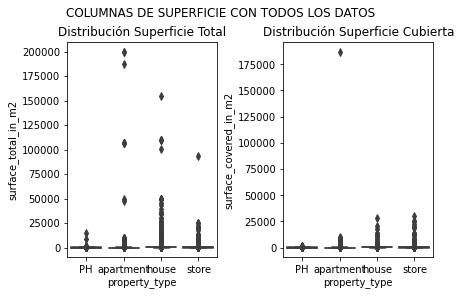

In [ ]:
fig1

In [ ]:
print(*outliers_precio , sep = "\n")

price_aprox_local_currency --- Maximo: 821271104.0 --- Promedio: 4229397.0 --- Mediana: 2558452.0
price_aprox_usd --- Maximo: 46545445.0 --- Promedio: 239701.0 --- Mediana: 145000.0
surface_total_in_m2 --- Maximo: 200000.0 --- Promedio: 211.0 --- Mediana: 83.0
surface_covered_in_m2 --- Maximo: 187000.0 --- Promedio: 130.0 --- Mediana: 75.0
price_usd_per_m2 --- Maximo: 206333.0 --- Promedio: 2160.0 --- Mediana: 1800.0
price_per_m2 --- Maximo: 4000000.0 --- Promedio: 6912.0 --- Mediana: 2213.0


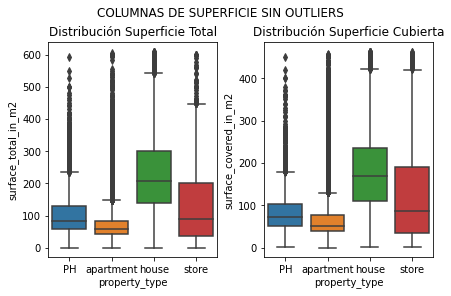

In [ ]:
fig2



# Análisis columnas: Variables m2 vs precios.

### "price_aprox_local_currency" , "price_aprox_usd" , "surface_total_in_m2" , "surface_covered_in_m2" , 
###  "price_usd_per_m2", "price_per_m2"
<br>

---


- Mismas filas con NA en columna price_aprox_usd y price_local_currency: No hace falta convertir local currency a USD
- Se dropea Local Currency.
- No es util reemplazar precios aprox USD con valores price usd per m2, ya que no aporta nuevos valores.
- Debido a que hay valores NA en precio usd per m2 y no en price per m2, es conveniente convertir a usd esos valores.
- Dropear outliers con límites definidos previamente, baja 12% de datos respecto al total.
- Decidimos eliminar 107 filas con precio <10kusd ya que consideramos seran alquileres o propiedades que van a alterar el modelo
- Se elimina currency UYU y PEN, 3 valores en total.



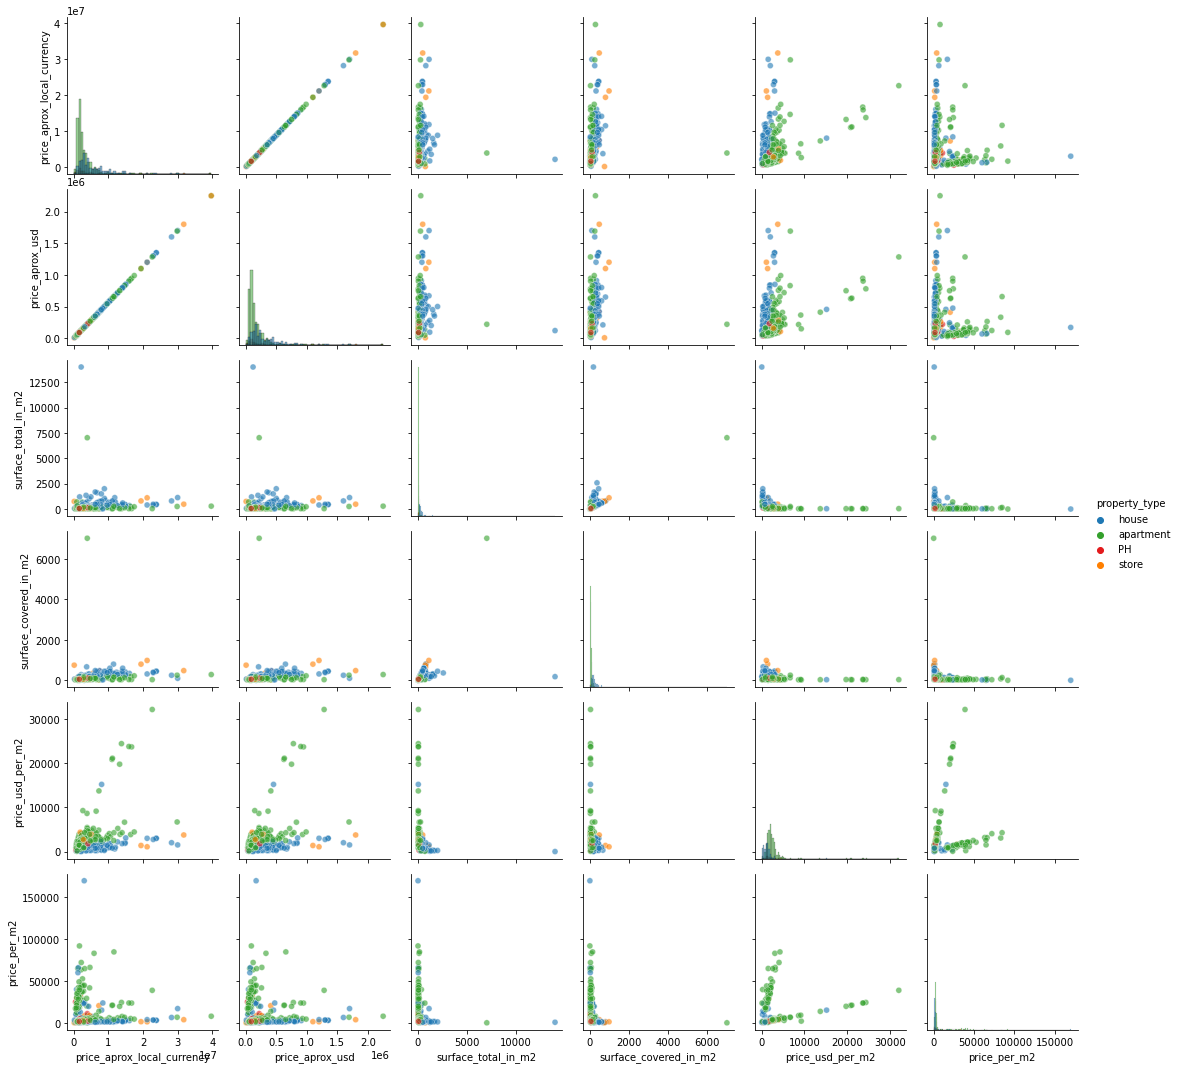

In [ ]:
# Grafico de relaciones entre las distintas columnas.
g3 = sns.PairGrid(data = data_precio_m2.sample(1000), hue='property_type', palette = palette[1:8:2] ) # se utiliza misma paleta
g3.map_diag(sns.histplot) # Probar con kdeplot
g3.map_offdiag(sns.scatterplot, alpha=0.6)
g3.add_legend()

- Relaciones no intuitivas observadas en m2 vs precio: A menos superifcie cubierta, mayor costo. Esto se debe a que el tipo de propiedad de mayor precio son los departamentos, y que tienen menor superficie cubierta. 
- Se filtra outliers para "price_aprox_usd" y para "price_usd_per_m2"

### A CONTINUACION SE OBSERVAN LOS DATOS DE PRECIO Y M2 SIN OUTLIERS

- % de valores sin outliers respecto al total:  88.18 
- limites considerados: Precio total 1000000 usd, Precio por m2 10000 usd 



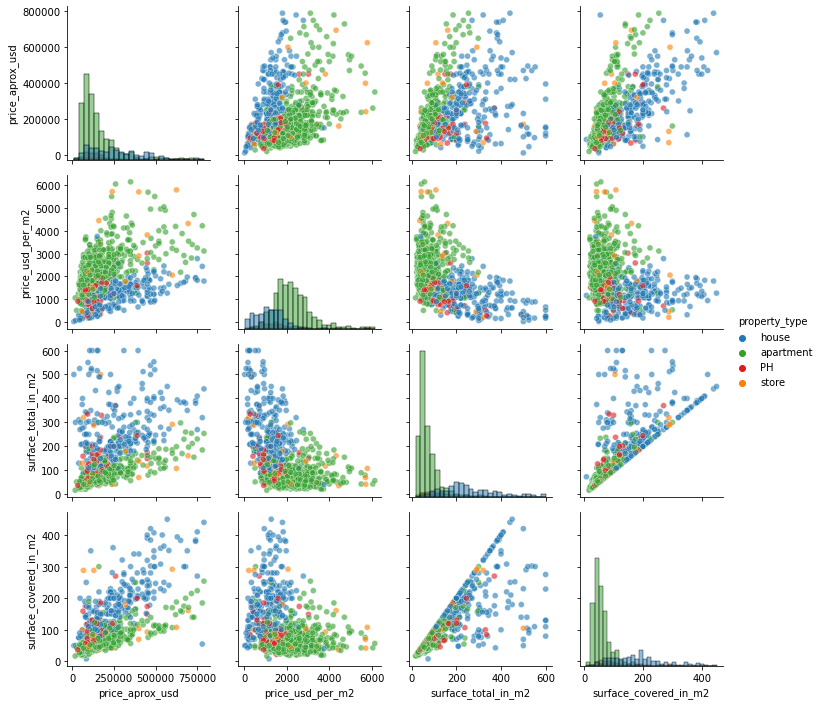

In [ ]:
g4 = sns.PairGrid(data = data_precio_m2_acotado.sample(1000), hue='property_type', palette = palette[1:8:2] )
g4.map_diag(sns.histplot)
g4.map_offdiag(sns.scatterplot, alpha=0.6)
g4.add_legend()



# Análisis columnas: Regex para atributos adicionales, precio, m2, rooms

### "description" , "rooms" , 

<br>

---
- Aplicamos regex para obtener los precios desde la descripción. Donde se observa que no hay carga de dato se reemplaza por
no informa
- % a modificar en columna ROOMS : 19%
- No es útil realizar extracción de datos de precios. Bajo porcentaje.
- Se generan nuevas columnas con atributos de cada propiedad (pileta, terraza , etc).



- Dado el alto número de NA en expenses decidimos volverla una variable categorica que determina si tiene o no expensas.

In [ ]:
data['with_expenses'].value_counts()

False    56268
True     14043
Name: with_expenses, dtype: int64

- Analizamos la posibilidad de que haya alquileres catalogados como ventas
- Concluimos que hay valores en ARS que estarían debajo de los 10kusd, se dropean.
- Agregamos columnas que identifican la existencia de determinados amenities

In [ ]:
display (data[amenities].head(10))

,Garage,underfloor_heating,grill,balcony_or_yard,terrace,pool
0,False,False,False,False,False,False
2,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
11,False,False,False,False,False,False
12,False,False,False,True,True,False
13,False,False,False,True,False,False
15,False,False,True,False,False,False


- Datos de rooms limpio

In [ ]:
print(tabla_rooms)

                                         description rooms_clean
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...           2
1  Venta de departamento en décimo piso al frente...  No informa
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...           2
3  PH 3 ambientes con patio. Hay 3 deptos en lote...           3
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...  No informa
5  Casa en el perímetro del barrio 338, ubicada e...  No informa
6  MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...  No informa
7  EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...           1
8  EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER...           2
9  MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...  No informa



# Análisis columnas: Geolocalización - Evaluación ubicaciones

### "place_name" , "place_with_parent_names" , "country_name" , 
### "state_name" , "lat-lon" , "lat" , "lon" , "geonames_id"

<br>

---

- Reemplazo de NA de place_name: Ubicación encontrada tigre a partir de place_with_partent_name
- 35.8 porciento de NA en lat-lon, pero con información en geonames_id. Se reemplaza por datos de la API del sitio:http://www.geonames.org/search.html?q=&country=AR. Se completa un % 34.92
- Porcentaje de puntos ubicados correctamente dentro del polígono de provincia: % 0.997
- No se observa una clara relación entre la cercanía a la estación de subte y el precio
- Remplazo los valores del Dataset original con valores NaN por los de la columna lon/lat_API


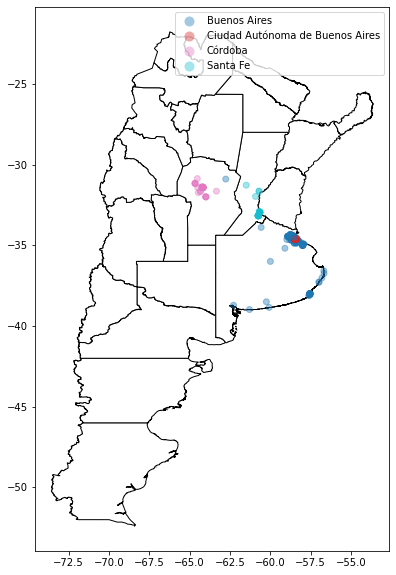

In [ ]:
fig5 # Ubicación en provincias

- Se filtró provincias con mas de 1000 propiedades vendidas.
- Observamos que en su gran mayoría los puntos se encuentran en los límites dentro del polígono de provincia y por eso figuran como equivocados. El polígono de Córdoba no parece ser correcto ya que los puntos se encuentran en el centro
- Se observa que la gran mayoría de los puntos se encuentran en las cercanías del límite exacto del barrio


- No se observa una clara relación entre la cercanía a la estación de subte y el precio
- Evalúo de forma gráfica si hay una relación entre el precio y la cercanía a las estaciones de subte
- De forma gráfica tampoco se observa una relación tan clara entre el precio y la cercanía  a una Estación de Subte

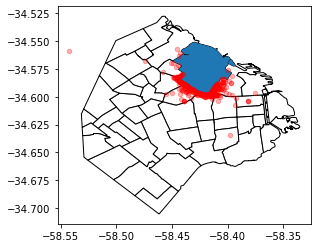

In [ ]:
fig6 # Evaluación de ubicaciones en los límites de barrio.

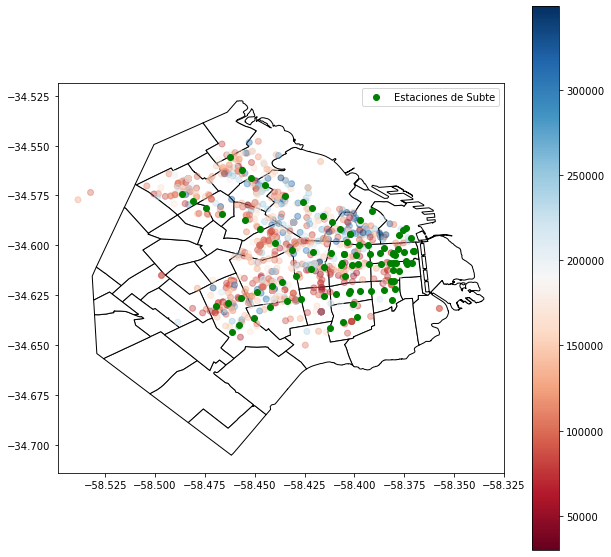

In [ ]:
fig7 # Comparativa entre costo de propiedad y ubicación de las propiedades en relación al subte.

In [ ]:
print(*NA_finales , sep="\n") # NA FINALES LUEGO DE LIMPIEZA

0.0 % NA Columna:  operation
0.0 % NA Columna:  property_type
0.0 % NA Columna:  place_name
0.0 % NA Columna:  place_with_parent_names
0.0 % NA Columna:  country_name
0.0 % NA Columna:  state_name
0.0 % NA Columna:  surface_total_in_m2
0.0 % NA Columna:  surface_covered_in_m2
0.0 % NA Columna:  Price_USD
0.0 % NA Columna:  rooms
0.0 % NA Columna:  floor
0.0 % NA Columna:  with_expenses
0.0 % NA Columna:  pool
0.0 % NA Columna:  terrace
0.0 % NA Columna:  balcony_or_yard
0.0 % NA Columna:  grill
0.0 % NA Columna:  underfloor_heating
0.0 % NA Columna:  Garage
0.0 % NA Columna:  place_name_parent
0.0 % NA Columna:  province
0.0 % NA Columna:  lat
0.0 % NA Columna:  lon
0.0 % NA Columna:  Price_USD_per_m2



# CONCLUSIONES

- Observamos que el dataset orginal contaba con 25 columnas que en lineas generales se pueden clasificar como datos característicos de la vivienda, datos referentes a la operación inmobiliaria y datos geográficos.datos referentes a la operación inmobiliaria

- Las columnas iniciales con información sobre las características de la vivienda junto a su porcentaje de valores nulos fueron las siguientes:

93.5 % NA Columna:  floor \
60.9 % NA Columna:  rooms \
88.2 % NA Columna:  expenses \
0.0 % NA Columna:  description \
0.0 % NA Columna:  title \
32.4 % NA Columna:  surface_total_in_m2 \
16.4 % NA Columna:  surface_covered_in_m2

- Las columnas iniciales con datos referentes a la operación inmobiliaria y su porcentaje de valores nulos fueron:
    
0.0 % NA Columna:  operation \
0.0 % NA Columna:  property_type \
16.8 % NA Columna:  price \
16.8 % NA Columna:  currency \
16.8 % NA Columna:  price_aprox_local_currency \
16.8 % NA Columna:  price_aprox_usd \
43.4 % NA Columna:  price_usd_per_m2 \
27.7 % NA Columna:  price_per_m2 

- Si bien todas las operaciones del dataset original estaban clasificadas como ventas, al cruzar los datos con la columna de precios, detectamos valores bajos los cuales descartamos por ser inconsistentes con dicha operación



## Se detalla paso a paso la operatoria aplicada para cada columna

### ° "place_name" 
### ° "place_with_parent_names"
### ° "country_name" , 
### ° "state_name" , "lat-lon" , "lat" , "lon" , "geonames_id"
   * Se avanzo sobre las misma validando y recuperando todos los NA posibles a través de una API (Geonames) y logrando como resultado recuperar el 83% de la información. También se validó que los nombres coincidieran con su ubicación geográfica, donde nos encontramos que varios datos estaban mal clasificados con poca diferencia entre los polígonos de barrios/Provincias por lo que se mantuvo la clasificación original.
   
### ° "price"
### ° "currency"
### ° "price_aprox_local_currency"
### ° "price_aprox_usd"
### ° "price_per_m2"
   * Sobre esta no pudimos recuperar datos, se intentó aplicar text mining sobre el texto de las descripciones y obtuvimos menos del 0,5% de datos, por lo que no se  decidió avanzar con el analisis en el modelo. Respecto de las columnas currency homogenizamos la moneda con precios promedios del primer semestre de 2017 (tipo de cambio USD) y también se intentó realizar un cruce de datos con la columna de price_per_m2 con la columna superficie pero no logramos obtener nueva información. Además, se analizaron el resto de las columnas con información del precio, pero no había datos disponibles – Se dropean outliers con rango intercuartil.
   
### ° "surface_total_in_m2"
### ° "surface_covered_in_m"
   * Se evalua que habia inconsistencias entre estas variables, dado que en algunos casos la columna superficie de metros cubiertos arrojaba datos numericos mayores a la de superficie metros totales de la propiedad. Para limpiar estos errores se decidió reemplazar los datos de superficie total por los de superficie cubierta siempre y cuando que los ultimos sean mayores a los primeros. En caso de que superficie total supere a la cubierta se deja el dato original.
   
### ° "Rooms"
  * Sobre esta columna se pudo recuperar el 20% de los datos a través de text mining. Decidimos dejar los valores nulos y outliers como “No informa” (aquellos con más de 11 ambientes).
  
### °"Floor"  
   * Sobre esta columna se pudo recuperar el 14% de datos a través de text mining. Decidimos dejar los valores nulos y outliers como “No informa” (aquellos con pisos superiores a 27 utilizando como variable comparativa al edificio más alto de Argentina)
   
### °"Expenses"   
   * En este caso dada la alta cantidad de nulos se formulo la columnas de manera discretizada, señalando la existencia o no de expensas para cada fila del dataset.
   
### °"Amenities"
   * A partir de los datos de "descripción" y "title" que hay en el dataset original.Se agregaron varias columnas que tienen el valor discretizado de distintos amenities de interés para cada propiedad.



<br>

In [ ]:
# TP 2

Que hagan el OLS con sm y que discutan los resultados en terminos estadisticos.
Que hagan Lasso/Ridge con skl y comparen con OLS.
Que tengan un modelo con el cual poder predecir precios de propiedades dadas su caracteristicas.

In [ ]:
len(data)

70311

In [ ]:
len(data[data["state_name"] == "Capital Federal"])

24349

In [ ]:
data.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,surface_total_in_m2,surface_covered_in_m2,Price_USD,rooms,...,terrace,balcony_or_yard,grill,underfloor_heating,Garage,place_name_parent,province,lat,lon,Price_USD_per_m2
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,40.0,62000.0,2,...,False,False,False,False,False,Mataderos,Capital Federal,-34.661824,-58.508839,1127.272727
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,55.0,72000.0,2,...,False,False,False,False,False,Mataderos,Capital Federal,-34.652262,-58.522982,1309.090909
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,35.0,35.0,64000.0,No informa,...,False,False,False,False,False,Centro,Buenos Aires Costa Atlántica,-38.002626,-57.549447,1828.571429
5,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,106.0,78.0,130000.0,No informa,...,False,False,False,False,False,Munro,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,1226.415094
6,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,45.0,40.0,138000.0,1,...,False,False,False,False,False,Belgrano,Capital Federal,-34.559873,-58.443362,3066.666667


In [ ]:
len(data_inicial.loc[data_inicial["state_name"] == "Capital Federal","lat-lon"])

32316

## Construyendo el modelo de Regresión Lineal



1.   Preparar los datos en una **matriz de features y un array target**.

2.   Elegir una clase de modelo importando la **clase de estimador** apropiado de Scikit-Learn.

3.   Seleccionar los **hiperparámetros** del modelo **instanciando** la clase con los valores deseados

4.   Ajustar el modelo a los datos invocando el método** fit()** de la instancia del modelo.

5.   Aplicar el modelo a **nuevos datos**:



# Version alternativa

Voy a tratar de reproducir lo que entiendo que querian hacer simplificandolo y corrigiendo errore a ver si da algo razonable. Y voy a poner comentarios en las demas celdas con cosas que creo que habria que corregir.

In [ ]:
# Celda de Ioni

data_ols = data[data["state_name"] == "Capital Federal"]
data_ols = data_ols[data_ols['surface_total_in_m2']<1000]
data_ols = data_ols[(data_ols['lat']>-36) & (data_ols['lon']>-60) ]
data_ols.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,surface_total_in_m2,surface_covered_in_m2,Price_USD,rooms,...,terrace,balcony_or_yard,grill,underfloor_heating,Garage,place_name_parent,province,lat,lon,Price_USD_per_m2
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,40.0,62000.0,2,...,False,False,False,False,False,Mataderos,Capital Federal,-34.661824,-58.508839,1127.272727
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,55.0,72000.0,2,...,False,False,False,False,False,Mataderos,Capital Federal,-34.652262,-58.522982,1309.090909
6,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,45.0,40.0,138000.0,1,...,False,False,False,False,False,Belgrano,Capital Federal,-34.559873,-58.443362,3066.666667
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,65.0,60.0,195000.0,2,...,False,False,False,False,False,Belgrano,Capital Federal,-34.559873,-58.443362,3000.000000
12,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,50.0,30.0,111700.0,1,...,True,True,False,False,False,Palermo Soho,Capital Federal,-34.588560,-58.430530,2234.000000


In [ ]:
data_ols = data[data["state_name"] == "Capital Federal"] # Ok

In [ ]:
data_ols = data_ols[data_ols['surface_total_in_m2']<1000] # Ok

In [ ]:
data_ols = data_ols[data_ols['Price_USD_per_m2']<10000] # No tiene sentido usar esta columna porque es muy similar a la target, o tratan de estimar el precio o el precio por metro cuadrado, pero usar una para la otra no tiene sentido. Se supone que no saben el precio para una casa nueva.

In [ ]:
data_ols = data_ols[(data_ols['lat']>-36) & (data_ols['lon']>-60) ] # ok

In [ ]:
data_ols.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,surface_total_in_m2,surface_covered_in_m2,Price_USD,rooms,...,terrace,balcony_or_yard,grill,underfloor_heating,Garage,place_name_parent,province,lat,lon,Price_USD_per_m2
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,40.0,62000.0,2,...,False,False,False,False,False,Mataderos,Capital Federal,-34.661824,-58.508839,1127.272727
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,55.0,72000.0,2,...,False,False,False,False,False,Mataderos,Capital Federal,-34.652262,-58.522982,1309.090909
6,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,45.0,40.0,138000.0,1,...,False,False,False,False,False,Belgrano,Capital Federal,-34.559873,-58.443362,3066.666667
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,65.0,60.0,195000.0,2,...,False,False,False,False,False,Belgrano,Capital Federal,-34.559873,-58.443362,3000.000000
12,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,50.0,30.0,111700.0,1,...,True,True,False,False,False,Palermo Soho,Capital Federal,-34.588560,-58.430530,2234.000000


# Sigo...

In [ ]:
# Celda Ioni

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools import eval_measures
from sklearn.preprocessing import StandardScaler

linreg = LinearRegression()

data_ols = data_ols[data_ols["property_type"]=="apartment"]

# Esto esta porque hay un problema antes, hay que revisar porque estas columnas son object y no bool en el momento en que se crean.
data_ols[['with_expenses','pool', 'terrace', 'balcony_or_yard', 'grill', 'underfloor_heating','Garage']] = \
data_ols[['with_expenses','pool', 'terrace', 'balcony_or_yard', 'grill', 'underfloor_heating','Garage']].applymap(lambda x: 1 if x else 0)

X = data_ols[['lat','lon','surface_total_in_m2','surface_covered_in_m2', 'with_expenses','pool', 'terrace', 'balcony_or_yard', 'grill', 'underfloor_heating','Garage']]
y = data_ols["Price_USD"]
X_sm = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)


model = sm.OLS(y_train, X_train).fit()

model.summary()

C:\Anaconda3\envs\DH\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_USD   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                          1.140e+04
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        14:40:56   Log-Likelihood:                     -1.8442e+05
No. Observations:               14625   AIC:                                  3.689e+05
Df Residuals:                   14614   BIC:                                  3.689e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
lat                    3.263e+05    1.6e+04     20.400      0.000    2.95e+05    3.58e+05
lon                   -1.934e+05   9472.887    -20.420      0.000   -2.12e+05   -1.75e+05
surface_total_in_m2     963.7814     39.753     24.245      0.000     885.861    1041.701
surface_covered_in_m2  1478.8730     45.354     32.607      0.000    1389.973    1567.773
with_expenses         -3064.4079   1265.546     -2.421      0.015   -5545.037    -583.778
pool                   3.933e+04   1979.130     19.874      0.000    3.55e+04    4.32e+04
terrace                1.023e+04   1775.757      5.760      0.000    6746.918    1.37e+04
balcony_or_yard       -1.438e+04   1626.741     -8.838      0.000   -1.76e+04   -1.12e+04
grill                 -1.395e+04   1892.659     -7.369      0.000   -1.77e+04   -1.02e+04
underfloor_heating     3.075e+04   2646.735     11.619      0.000    2.56e+04    3.59e+04
Garage                 2.542e+04   1633.608     15.562      0.000    2.22e+04    2.86e+04
==============================================================================
Omnibus:                     3660.347   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79828.550
Skew:                           0.676   Prob(JB):                         0.00
Kurtosis:                      14.365   Cond. No.                     3.98e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
for col in X.columns:
    print (X[col].dtype)
    print (X[col].head())

X.head()


float64
2    -34.652262
6    -34.559873
7    -34.559873
12   -34.588560
13   -34.588560
Name: lat, dtype: float64
float64
2    -58.522982
6    -58.443362
7    -58.443362
12   -58.430530
13   -58.430530
Name: lon, dtype: float64
float64
2     55.0
6     45.0
7     65.0
12    50.0
13    42.0
Name: surface_total_in_m2, dtype: float64
float64
2     55.0
6     40.0
7     60.0
12    30.0
13    31.0
Name: surface_covered_in_m2, dtype: float64
bool
2     False
6     False
7     False
12    False
13    False
Name: with_expenses, dtype: bool
object
2     False
6     False
7     False
12    False
13    False
Name: pool, dtype: object
object
2     False
6     False
7     False
12     True
13    False
Name: terrace, dtype: object
object
2     False
6     False
7     False
12     True
13     True
Name: balcony_or_yard, dtype: object
object
2     False
6     False
7     False
12    False
13    False
Name: grill, dtype: object
object
2     False
6     False
7     False
12    False
13    False
Name: un

,lat,lon,surface_total_in_m2,surface_covered_in_m2,with_expenses,pool,terrace,balcony_or_yard,grill,underfloor_heating,Garage
2,-34.652262,-58.522982,55.0,55.0,False,False,False,False,False,False,False
6,-34.559873,-58.443362,45.0,40.0,False,False,False,False,False,False,False
7,-34.559873,-58.443362,65.0,60.0,False,False,False,False,False,False,False
12,-34.588560,-58.430530,50.0,30.0,False,False,True,True,False,False,False
13,-34.588560,-58.430530,42.0,31.0,False,False,False,True,False,False,False


In [ ]:
X = data_ols[['lat','lon','surface_total_in_m2','surface_covered_in_m2', 'with_expenses','pool', 'terrace', 'balcony_or_yard', 'grill', 'underfloor_heating','Garage']]
y = data_ols["Price_USD"]


In [ ]:
# transformación de bool a int

data_ols[['with_expenses','pool', 'terrace', 'balcony_or_yard', 'grill', 'underfloor_heating','Garage']] = \
data_ols[['with_expenses','pool', 'terrace', 'balcony_or_yard', 'grill', 'underfloor_heating','Garage']].applymap(lambda x: 1 if x else 0)

# Esto no hace falta, las variables boolean se toman como 0 o 1 automaticamente en cualquier interpretacion numerica de las columnas.
# Estuve revisando y por alguna razon (supongo que tiene que ver con el codigo cuando la crearon, las columnas estan como object, no como bool, no entiendo porque. Eso si hay que revisarlo y/o solucionarlo.)

In [ ]:
# Importamos paquete, instanciamos el estimador y fiteamos el modelo ("classic" sklearn!)
#!pip install sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Instanciamos el modelo

linreg = LinearRegression() #ok

In [ ]:
dummies_prop = pd.get_dummies(data['property_type'], drop_first = True) # Aca hacen lio porque mezclan los dataframe data y data_ols donde ya habian aplicado filtros, entonces tiene matrices de diferente demencionalidad y ademas rompen los criterios anteriores. Sospecho que por esto les dio tan mal el ajuste.
data_ols = pd.concat( [data, dummies_prop], axis=1)
data_ols.head()

# En cualquier caso esto lo tenian que hacer antes de crear la variable X y ademas cuando consideran la variable X no toman la columna property_type

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,surface_total_in_m2,surface_covered_in_m2,Price_USD,rooms,...,underfloor_heating,Garage,place_name_parent,province,lat,lon,Price_USD_per_m2,apartment,house,store
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,40.0,62000.0,2,...,False,False,Mataderos,Capital Federal,-34.661824,-58.508839,1127.272727,0,0,0
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,55.0,72000.0,2,...,False,False,Mataderos,Capital Federal,-34.652262,-58.522982,1309.090909,1,0,0
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,35.0,35.0,64000.0,No informa,...,False,False,Centro,Buenos Aires Costa Atlántica,-38.002626,-57.549447,1828.571429,1,0,0
5,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,106.0,78.0,130000.0,No informa,...,False,False,Munro,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,1226.415094,0,0,0
6,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,45.0,40.0,138000.0,1,...,False,False,Belgrano,Capital Federal,-34.559873,-58.443362,3066.666667,1,0,0


In [ ]:
# Entrenamos el modelo 
linreg.fit(X, y)

LinearRegression()

In [ ]:
# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)

2744491.7147645038
[ 2.89427100e+04  2.72535867e+04  7.32556263e+00  5.34402528e+01
  2.47269554e+04  1.40553141e+05  2.99311700e+05 -1.82540499e+03
  9.70447858e+04  5.00224284e+04 -2.40607249e+04 -6.69356292e+03
  1.07716549e+05  2.74684288e+04]


In [ ]:
#!pip install statsmodels
import statsmodels.api as sm
from statsmodels.tools import eval_measures
from sklearn.preprocessing import StandardScaler


In [ ]:
# StandardScaler

numericals = ['surface_total_in_m2']

X = data_ols[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df.head()


,surface_total_in_m2_std
0,-0.417630
1,-0.417630
2,-0.514681
3,-0.320579
4,-0.466155


In [ ]:
X = std_df

In [ ]:
type(std_df)

pandas.core.frame.DataFrame

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)


type(X_train)

ValueError: Found input variables with inconsistent numbers of samples: [25934, 78459]

In [ ]:
X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_USD   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     473.8
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:41:37   Log-Likelihood:            -7.7465e+05
No. Observations:               54921   AIC:                         1.549e+06
Df Residuals:                   54916   BIC:                         1.549e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.428e+05   1378.894    176.083      0.000     2.4e+05    2.46e+05
lat_std                    4.651e+04   2095.453     22.194      0.000    4.24e+04    5.06e+04
lon_std                    4.981e+04   2095.286     23.774      0.000    4.57e+04    5.39e+04
surface_total_in_m2_std    1.985e+04   1578.776     12.576      0.000    1.68e+04    2.29e+04
surface_covered_in_m2_std   3.06e+04   1420.758     21.535      0.000    2.78e+04    3.34e+04
==============================================================================
Omnibus:                    76843.579   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         64209300.913
Skew:                           7.824   Prob(JB):                         0.00
Kurtosis:                     169.775   Cond. No.                         2.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))


310167.7210397399


In [ ]:
X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))

308155.25869236095


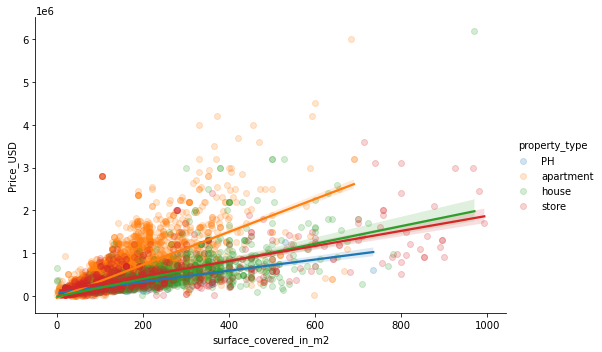

In [ ]:
sns.lmplot(x='surface_covered_in_m2', y='Price_USD', data=data_ols,
           aspect=1.45, scatter_kws={'alpha':0.2} , hue = "property_type")

In [ ]:
data_ols

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,surface_total_in_m2,surface_covered_in_m2,Price_USD,rooms,...,underfloor_heating,Garage,place_name_parent,province,lat,lon,Price_USD_per_m2,apartment,house,store
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,40.0,62000.0,2,...,False,False,Mataderos,Capital Federal,-34.661824,-58.508839,1127.272727,0,0,0
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,55.0,55.0,72000.0,2,...,False,False,Mataderos,Capital Federal,-34.652262,-58.522982,1309.090909,1,0,0
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,35.0,35.0,64000.0,No informa,...,False,False,Centro,Buenos Aires Costa Atlántica,-38.002626,-57.549447,1828.571429,1,0,0
5,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,106.0,78.0,130000.0,No informa,...,False,False,Munro,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,1226.415094,0,0,0
6,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,45.0,40.0,138000.0,1,...,False,False,Belgrano,Capital Federal,-34.559873,-58.443362,3066.666667,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107384,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,38.0,35.0,128000.0,No informa,...,False,False,Belgrano,Capital Federal,-34.562700,-58.458290,3368.421053,1,0,0
107385,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,44.0,39.0,165000.0,1,...,False,False,Recoleta,Capital Federal,-34.587425,-58.397372,3750.000000,1,0,0
107443,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,360.0,360.0,498000.0,No informa,...,False,False,Beccar,Bs.As. G.B.A. Zona Norte,-34.463120,-58.534810,1383.333333,0,1,0
107444,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,46.0,39.0,131500.0,1,...,False,False,Villa Urquiza,Capital Federal,-34.570639,-58.475596,2858.695652,1,0,0
